In [2]:
import os
import csv
import yaml

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors

from cycler import cycler
from scipy.stats import pearsonr
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd
import torch

In [22]:
pd.__version__
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

NUM_COLORS = 20
cm = plt.get_cmap('tab20')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
cycler = mpl.rcsetup.cycler(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
plt.rcParams['axes.prop_cycle'] = cycler

In [4]:
EDGE_DEVICES = {
    "jetson_cpu": "Nvidia Jetson CPU Only",
    "jetson_gpu": "Nvidia Jetson GPU Enabled",
    "rpi4_cpu": "Raspberry Pi 4B",
    "rpi3_cpu": "Raspberry Pi 3",
    "lattepanda": "LattePanda Delta"
}

x86_DEVICES= {
    "laptop_cpu": "Laptop Intel-i7 (8th Generation)",
    "herron_cpu": "Server Intel Xeon",
    "herron_gpu": "Server Nvidia RTX-8000",
    "v100": "Server Nvidia V100",
    "TitanX": "Server Nvidia TitanX",
    "2080Ti": "Server Nvidia 2080Ti",
    "3090": "Server Nvidia 3090",
}



In [5]:
BASELINE_VISUAL = {
    "resnet18": "ResNet-18",
    "vit32": "ViT32",
}

OTHER_VISUAL = {
    "alexnet": "AlexNet",
    "vgg16": "VGG16",
    "densenet": "DenseNet",
    "inception": "InceptionNet",
    "googlenet": "GoogLeNet",
    "resnext50_32x4d": "ResNext50",
    "wide_resnet50_2": "Wide ResNet-50"
}

EFFICIENT_VISUAL = {
    "efficientnet": "EfficientNet",
    "efficientnet_lite": "EfficientNet Lite",
    # "gernet": "GErNet", 
    "shufflenet": "ShuffleNet",
    "squeezenet": "SqueezeNet", 
    "mobilenet_v2": "MobileNet v2",
    "mnasnet": "MNAS Net"
    }

In [6]:
BASELINE_TRANSFORMERS = {
    "bert": "BERT-Base",
    "roberta": "RoBERTa"
}

OTHER_TRANSFORMERS = {
    'longformer': "Longformer", 
    'deberta': "DeBERTa",
    'albert': "Albert",
    'ibert': "ibert"
}

EFFICIENT_TRANSFORMERS = {
    'albert': "Albert",
    "distilbert": "DistilBERT",
    "mobile_bert": "MobileBERT",
    "squeeze_bert": "SqueezeBERT",
    "funnel_transformer": "Funnel Transformer"
}

In [7]:
LANGUAGE_MODELS = {**EFFICIENT_TRANSFORMERS, **BASELINE_TRANSFORMERS} # **OTHER_TRANSFORMERS }
VISION_MODELS = {**BASELINE_VISUAL, **EFFICIENT_VISUAL,} # **OTHER_VISUAL}


In [16]:
EXP_DIR = "pytorch/experiments/pretrained"
EXP_LIST = {
    # "2022_0906_pretrained": "fp32",
    "2022_0917_pretrained-fp16": "fp16",
    "2022_0917_pretrained-jit": "Torchscript",
    "2022_0917_pretrained-trt": "TensorRT"
}

DEVICE_LIST = {**x86_DEVICES, **EDGE_DEVICES}
MODEL_LIST = {**LANGUAGE_MODELS, **VISION_MODELS}

all_results = {}
for device, experiment in product(DEVICE_LIST, EXP_LIST):
    results_fname = os.path.join(EXP_DIR, f"{experiment}/{device}.csv")
    if os.path.exists(results_fname):
        all_results[(device, experiment)] = pd.read_csv(results_fname)


In [14]:
device_specs = {}
for device in DEVICE_LIST:
    spec_fname = f"pytorch/config/devices/specs/{device}.yaml"
    if os.path.exists(spec_fname):
        device_specs[device] = yaml.safe_load(open(spec_fname, "rb"))


146    15.0
Name: total_nn_calls, dtype: float64 146    0.008332
Name: latency, dtype: float64
134    62.0
Name: total_nn_calls, dtype: float64 134    0.003305
Name: latency, dtype: float64
158    410.0
Name: total_nn_calls, dtype: float64 158    0.022733
Name: latency, dtype: float64
140    174.0
Name: total_nn_calls, dtype: float64 140    0.015181
Name: latency, dtype: float64
128    135.0
Name: total_nn_calls, dtype: float64 128    0.006691
Name: latency, dtype: float64
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
0    112.0
Name: total_nn_calls, dtype: float64 0    0.004744
Name: latency, dtype: float64
8    403.0
Name: total_nn_calls, dtype: float64 8    0.025226
Name: latency, dtype: float64
16    172.0
Name: total_nn_calls, dtype: float64 16    0.007676
Name: latency, dtype: float64
88    151.0
Name: total_nn_calls, dtype: float64 88    0.006222
Name: latency, dtype: float64
48    57.0
Name: total_nn_calls, dtype: float64 48    0.002

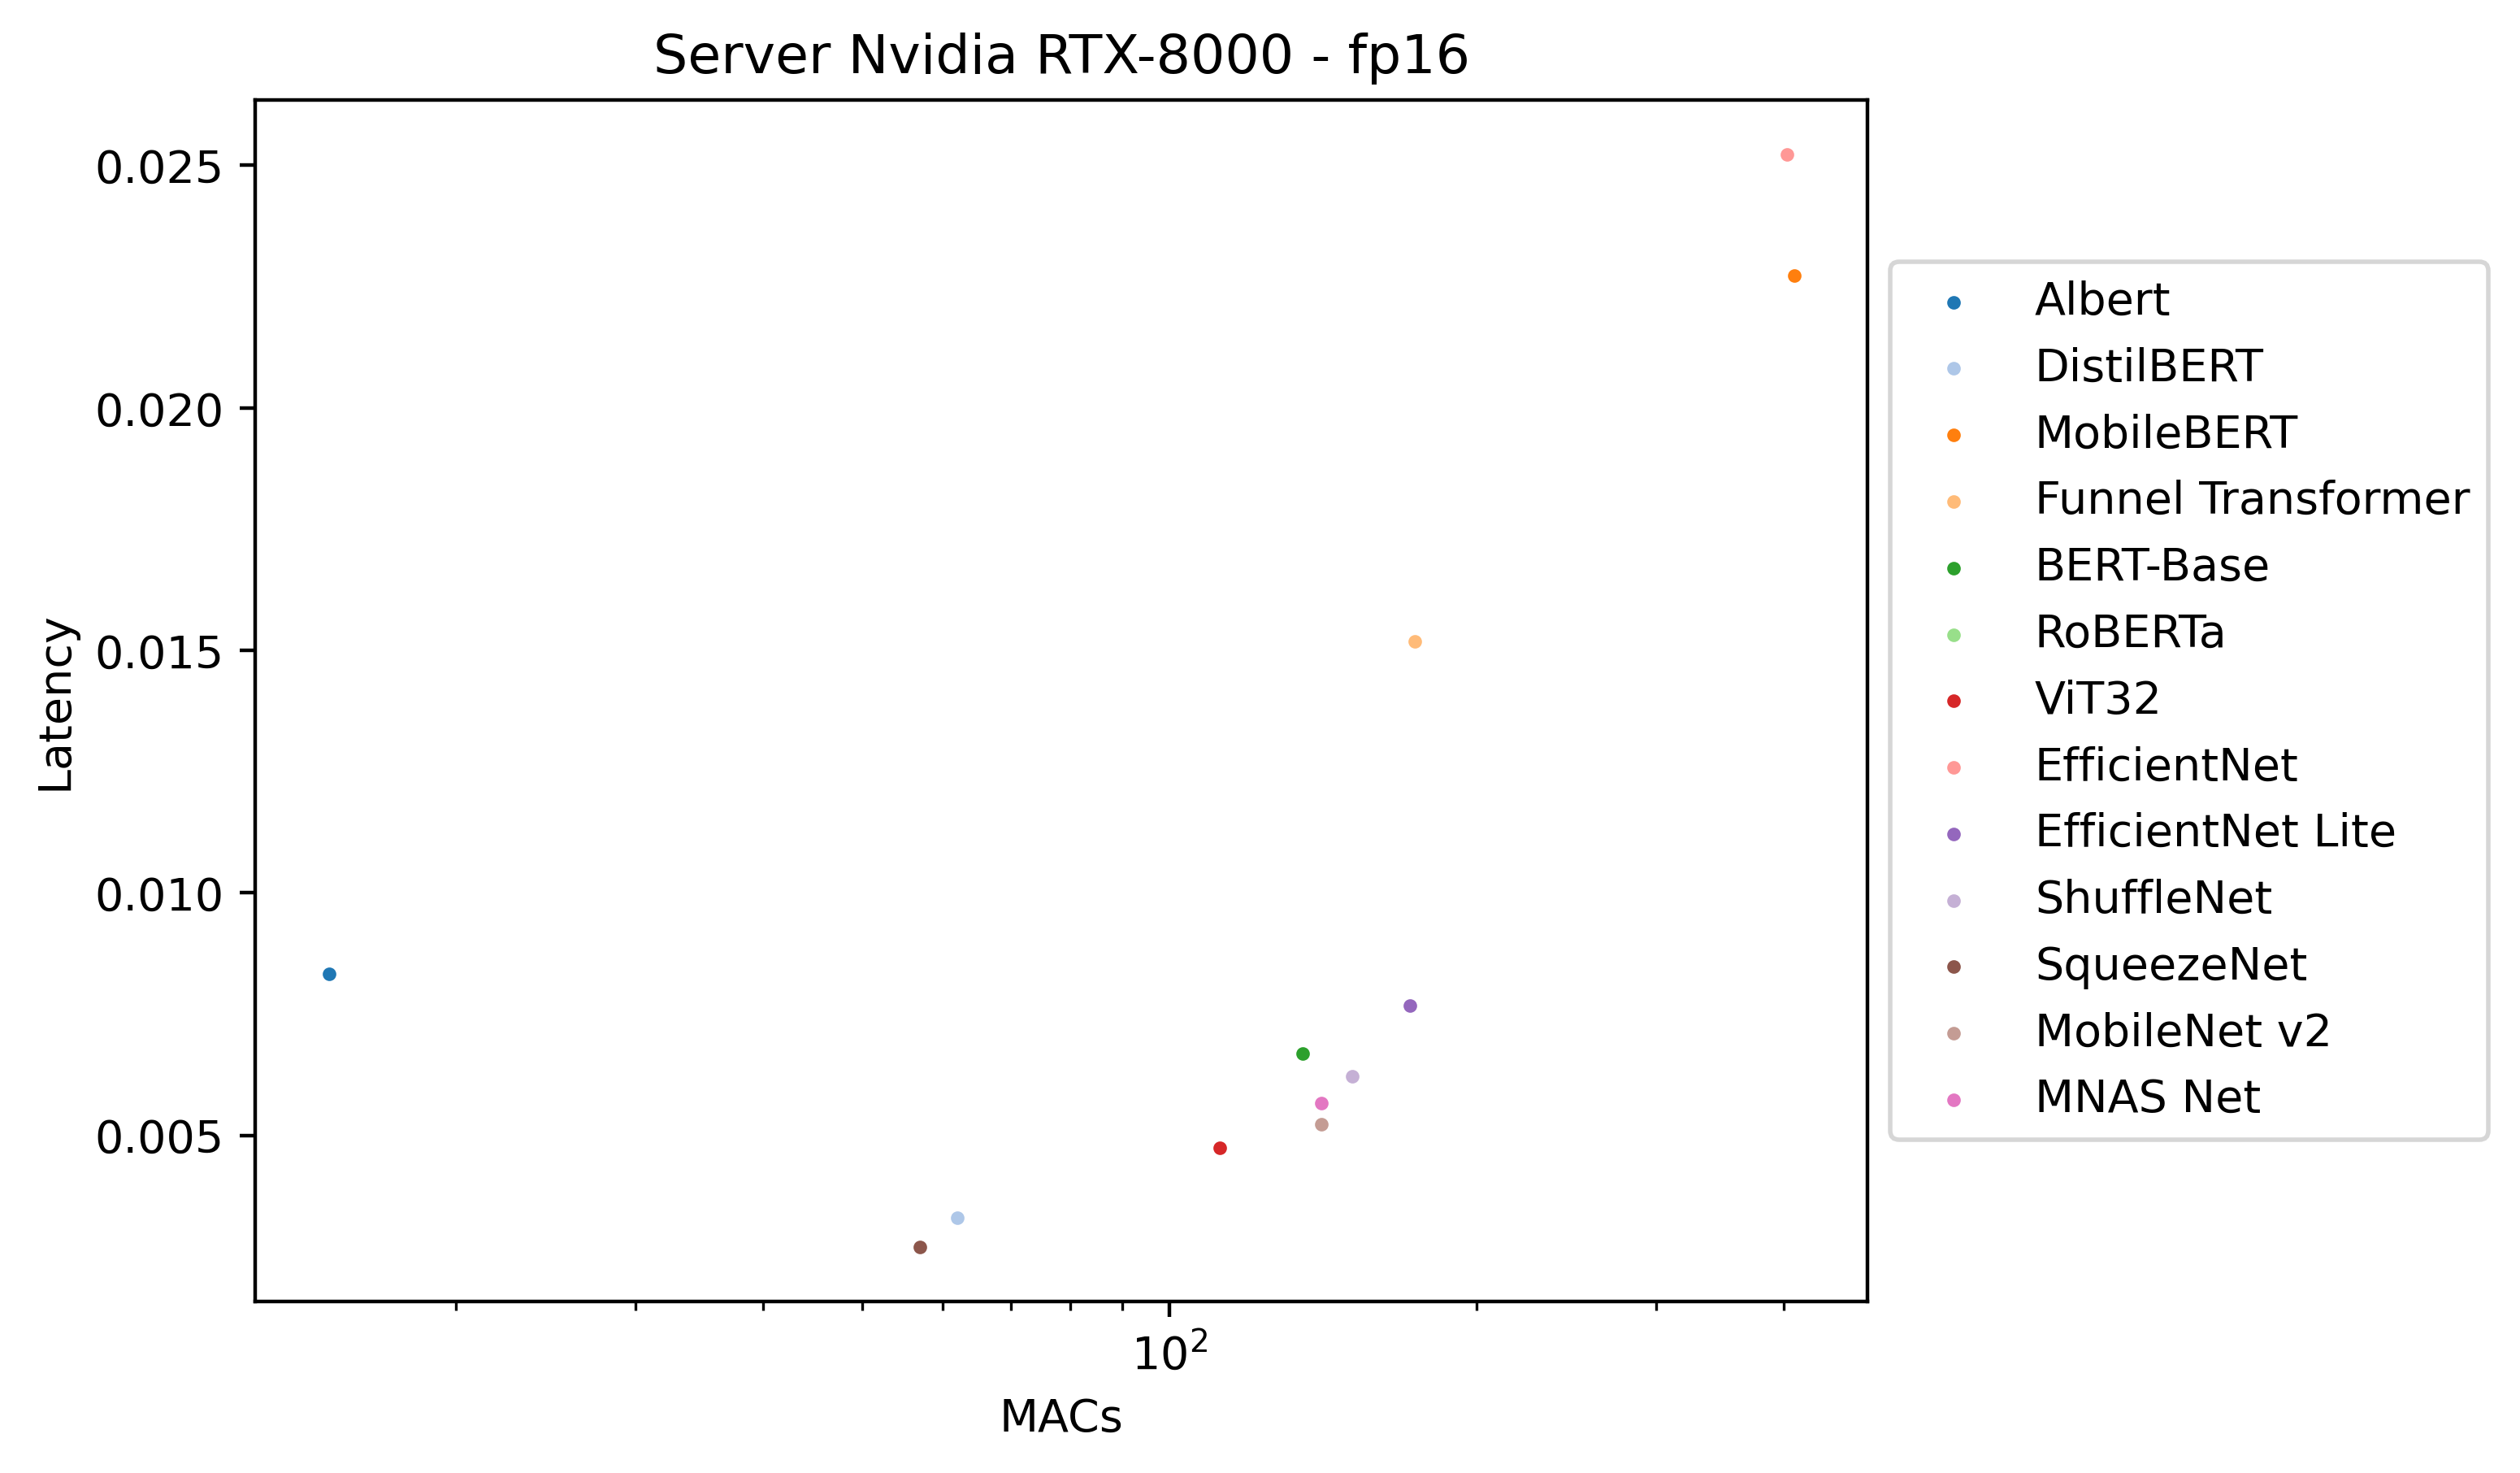

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)
Series([], Name: total_nn_calls, dtype: float64) Series([], Name: latency, dtype: float64)

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 2560x1920 with 1 Axes>

In [25]:
for device, experiment in all_results.keys():
    results = all_results[device, experiment]
    for model in { **LANGUAGE_MODELS, **VISION_MODELS}:
        if model in ["squeeze_bert", "resnet18"]: continue
        model_results = results[results['model'] == model].sort_values('macs')
        model_results = model_results[model_results['batch_size'] == 1]

        macs = model_results['macs']
        latency = model_results['latency']
        mem_used = model_results['max_memory']
        total_nn_calls = model_results['total_nn_calls']
        flop_per_byte = macs / (mem_used)
        fps = (macs) / latency

        print(total_nn_calls, latency)
        plt.scatter(total_nn_calls, latency, label=MODEL_LIST[model], s=4)
        # plt.plot(total_nn_calls, latency, linewidth=1)

        # plt.scatter(flop_per_byte, fps, label=model, s=4)
        # plt.plot(flop_per_byte, fps, linewidth=1)
    plt.title(f"{DEVICE_LIST[device]} - {EXP_LIST[experiment]}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Latency')
    plt.xlabel('MACs')
    # plt.yscale('log')
    plt.xscale('log')
    plt.show()

# rtx_bw = [2718.6, 2214.7, 339.9]
# rtx_emp_max_compute = 13164.5
# rtx_thr_max_compute = 16100

# xeon_bw = [456.9, 267.3, 105.1, 46.4, 35.7, 25.6]
# xeon_max = 171.3

# i7_bw = [283.4, 206.6, 141.7, 48.7, 33.1, 24.3]
# i7_max_compute = 54.9

# bw = rtx_bw
# max_compute = rtx_thr_max_compute

# logspace = np.logspace(-1, 3, 50)
# for mem in bw:
#     plt.plot(logspace, [min(mem * _, max_compute) * 1e9 for _ in logspace])


In [ ]:
results['batch_size'] == 1].sort_values('macs')

        macs = model_results['macs']
        latency = model_results['latency']
        mem_used = model_results['max_memory']
        total_nn_calls = model_results['total_nn_calls']
        flop_per_byte = macs / (mem_used)
        fps = (macs) / latency

        plt.scatter(total_nn_calls, latency, label=MODEL_LIST[model], s=4)
        plt.plot(total_nn_calls, latency, linewidth=1)

        # plt.scatter(flop_per_byte, fps, label=model, s=4)
        # plt.plot(flop_per_byte, fps, linewidth=1)
    plt.title(f"{DEVICE_LIST[device]} - {EXP_LIST[experiment]}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Latency')
    plt.xlabel('MACs')
    # plt.yscale('log')
    plt.xscale('log')
    plt.show()

# rtx_bw = [2718.6, 2214.7, 339.9]
# rtx_emp_max_compute = 13164.5
# rtx_thr_max_compute = 16100

# xeon_bw = [456.9, 267.3, 105.1, 46.4, 35.7, 25.6]
# xeon_max = 171.3

# i7_bw = [283.4, 206.6, 141.7, 48.7, 33.1, 24.3]
# i7_max_compute = 54.9

# bw = rtx_bw
# max_compute = rtx_thr_max_compute

# logspace = np.logspace(-1, 3, 50)
# for mem in bw:
#     plt.plot(logspace, [min(mem * _, max_compute) * 1e9 for _ in logspace])


<ipython-input-152-38422b6a4fd4>:83: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


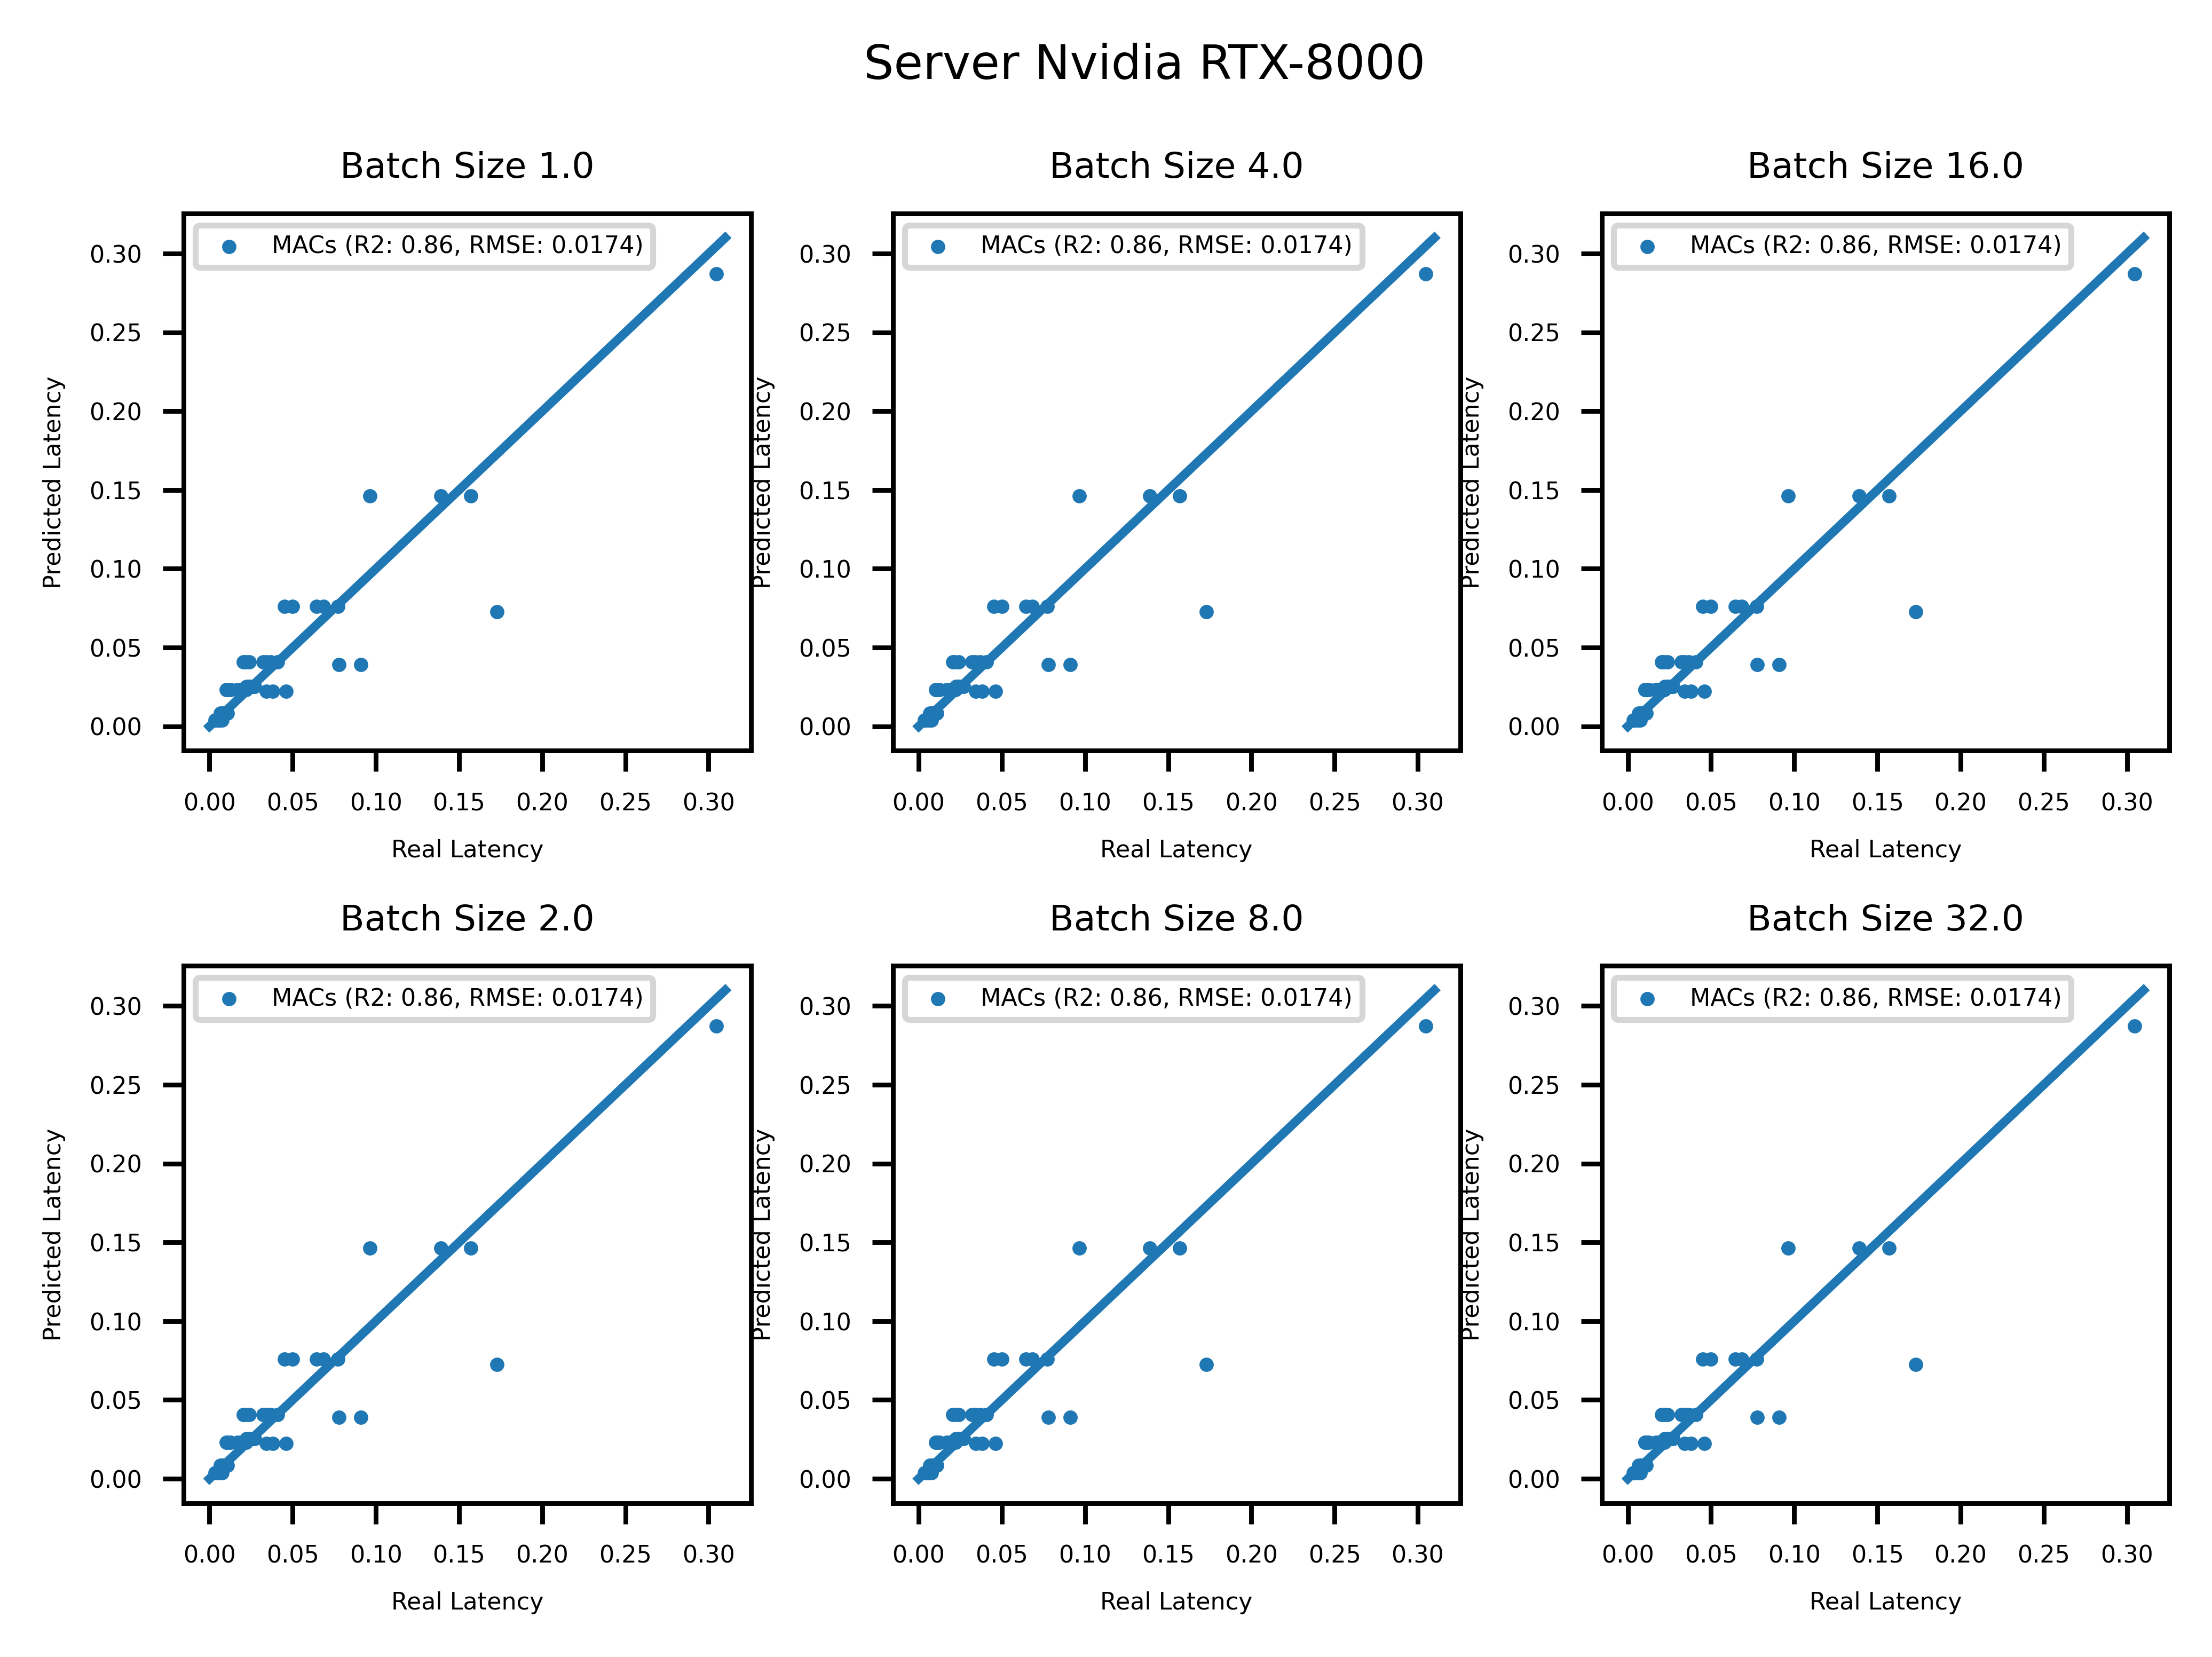

In [152]:
device = "herron_gpu"
device_df = pd.read_csv(f"/home/jaredfern/Research/CarnegieMellon/HardwareAware/Benchmarking/pytorch/experiments/pretrained/2022_0906_pretrained/{device}.csv")


fig, ax = plt.subplots(nrows=2, ncols=len(set(device_df['batch_size']))//2)
for idx, batch_size in enumerate(sorted(set(device_df['batch_size']))):
    plot = ax[idx % 2, idx // 2]
    device_df = pd.read_csv(f"/home/jaredfern/Research/CarnegieMellon/HardwareAware/Benchmarking/pytorch/experiments/pretrained/2022_0906_pretrained/{device}.csv")
    device_df = device_df[
        ~device_df['model'].isin(['albert', 'funnel_transformer', 'squeeze_bert'])
    ]
    device_df = device_df[
        device_df['model'].isin(LANGUAGE_MODELS)
    ]
    # device_df = device_df[device_df['batch_size'] == batch_size]
    flops_by_op = pd.concat([
        batch_df["<class 'torch.nn.modules.conv.Conv1d'>_macs"],
        batch_df["<class 'torch.nn.modules.conv.Conv2d'>_macs"],
        batch_df["<class 'torch.nn.modules.linear.Linear'>_macs"],
        batch_df["<class 'torch.nn.modules.normalization.LayerNorm'>_macs"],
        batch_df["<class 'torch.nn.modules.batchnorm.BatchNorm2d'>_macs"],
        batch_df["<class 'torch.nn.modules.pooling.AvgPool2d'>_macs"],
        batch_df["<class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>_macs"],
        batch_df["<class 'torch.nn.modules.activation.Softmax'>_macs"]
        ], axis=1).fillna(0)

    INFLECTION_MAC = 8e10
    compute_df = device_df[device_df['macs'] > INFLECTION_MAC]
    compute_latency = compute_df['latency'].fillna(0)
    compute_macs = compute_df['macs'].to_numpy().reshape(-1,1)

    mem_df = device_df[device_df['macs'] <= INFLECTION_MAC]
    mem_latency = mem_df['latency'].fillna(0)
    mem_nn_calls = mem_df['total_nn_calls'].to_numpy().reshape(-1,1)

    reg = LinearRegression(positive=True, fit_intercept=True).fit(compute_macs, compute_latency)
    reg_predicted = pd.DataFrame(reg.predict(compute_macs))
    reg_rsq = reg.score(compute_macs, compute_latency)
    reg_rmse = np.sqrt(mean_squared_error(reg_predicted, compute_latency))

    mem_reg = LinearRegression(positive=True, fit_intercept=False).fit(mem_nn_calls, mem_latency)
    mem_predicted = pd.DataFrame(mem_reg.predict(mem_nn_calls))

    all_predicted = pd.concat([mem_predicted, reg_predicted])
    all_latency = pd.concat([mem_latency, compute_latency])

    # multireg = LinearRegression(positive=True, fit_intercept=False).fit(flops_by_op, latency)
    # multireg.score(flops_by_op, latency)
    # multireg_predicted = multireg.predict(flops_by_op)
    # multireg_rsq = multireg.score(flops_by_op, latency)
    # multireg_rmse = np.sqrt(mean_squared_error(multireg_predicted, latency))
    # device_df['err'] = abs(batch_df['latency'] - multireg_predicted)

    # clock_speed = 3e9
    # manual_reg = macs / (clock_speed * 16)
    # manual_mse = np.sqrt(mean_squared_error(manual_reg, latency))
    # manual_score = r2_score(manual_reg, latency)

    # clock_speed = 1.5e9
    # manual_reg = macs / (clock_speed * 2034)
    # manual_mse = np.sqrt(mean_squared_error(manual_reg, latency))
    # manual_score = r2_score(manual_reg, latency)

    plot.scatter(all_latency, all_predicted, s=2,
                label=f"MACs (R2: {r2_score(all_latency, all_predicted):.2f}, RMSE: {np.sqrt(mean_squared_error(all_latency, all_predicted)):.4f})")
    # plot.scatter(latency, manual_reg,
    #             label=f"Manual MACS (R2: {manual_score:.2f}, RMSE: {manual_mse:.4f})", s=1)
    # plot.scatter(latency, multireg_predicted, s=2,
    #             label=f"MACs by Op (R2: {multireg_rsq:.2f}, RMSE: {multireg_rmse:.4f})")

    max_latency = max(all_latency)
    plot.plot(
        [_ * 0.01 for _ in range(int(max_latency / 0.01) + 2)],
        [_ * 0.01 for _ in range(int(max_latency / 0.01) + 2)])
    plot.set_xlabel('Real Latency', fontsize=4)
    plot.tick_params(axis='both', which='major', labelsize=4)

    plot.set_ylabel('Predicted Latency', fontsize=4)
    plot.set_title(f"Batch Size {batch_size}", fontsize=6)
    plot.legend(prop={'size': 4}, loc='upper left')
fig.suptitle(DEVICE_LIST[device], fontsize=8)
fig.subplots_adjust(hspace=0.4, wspace=0.25)
fig.show()

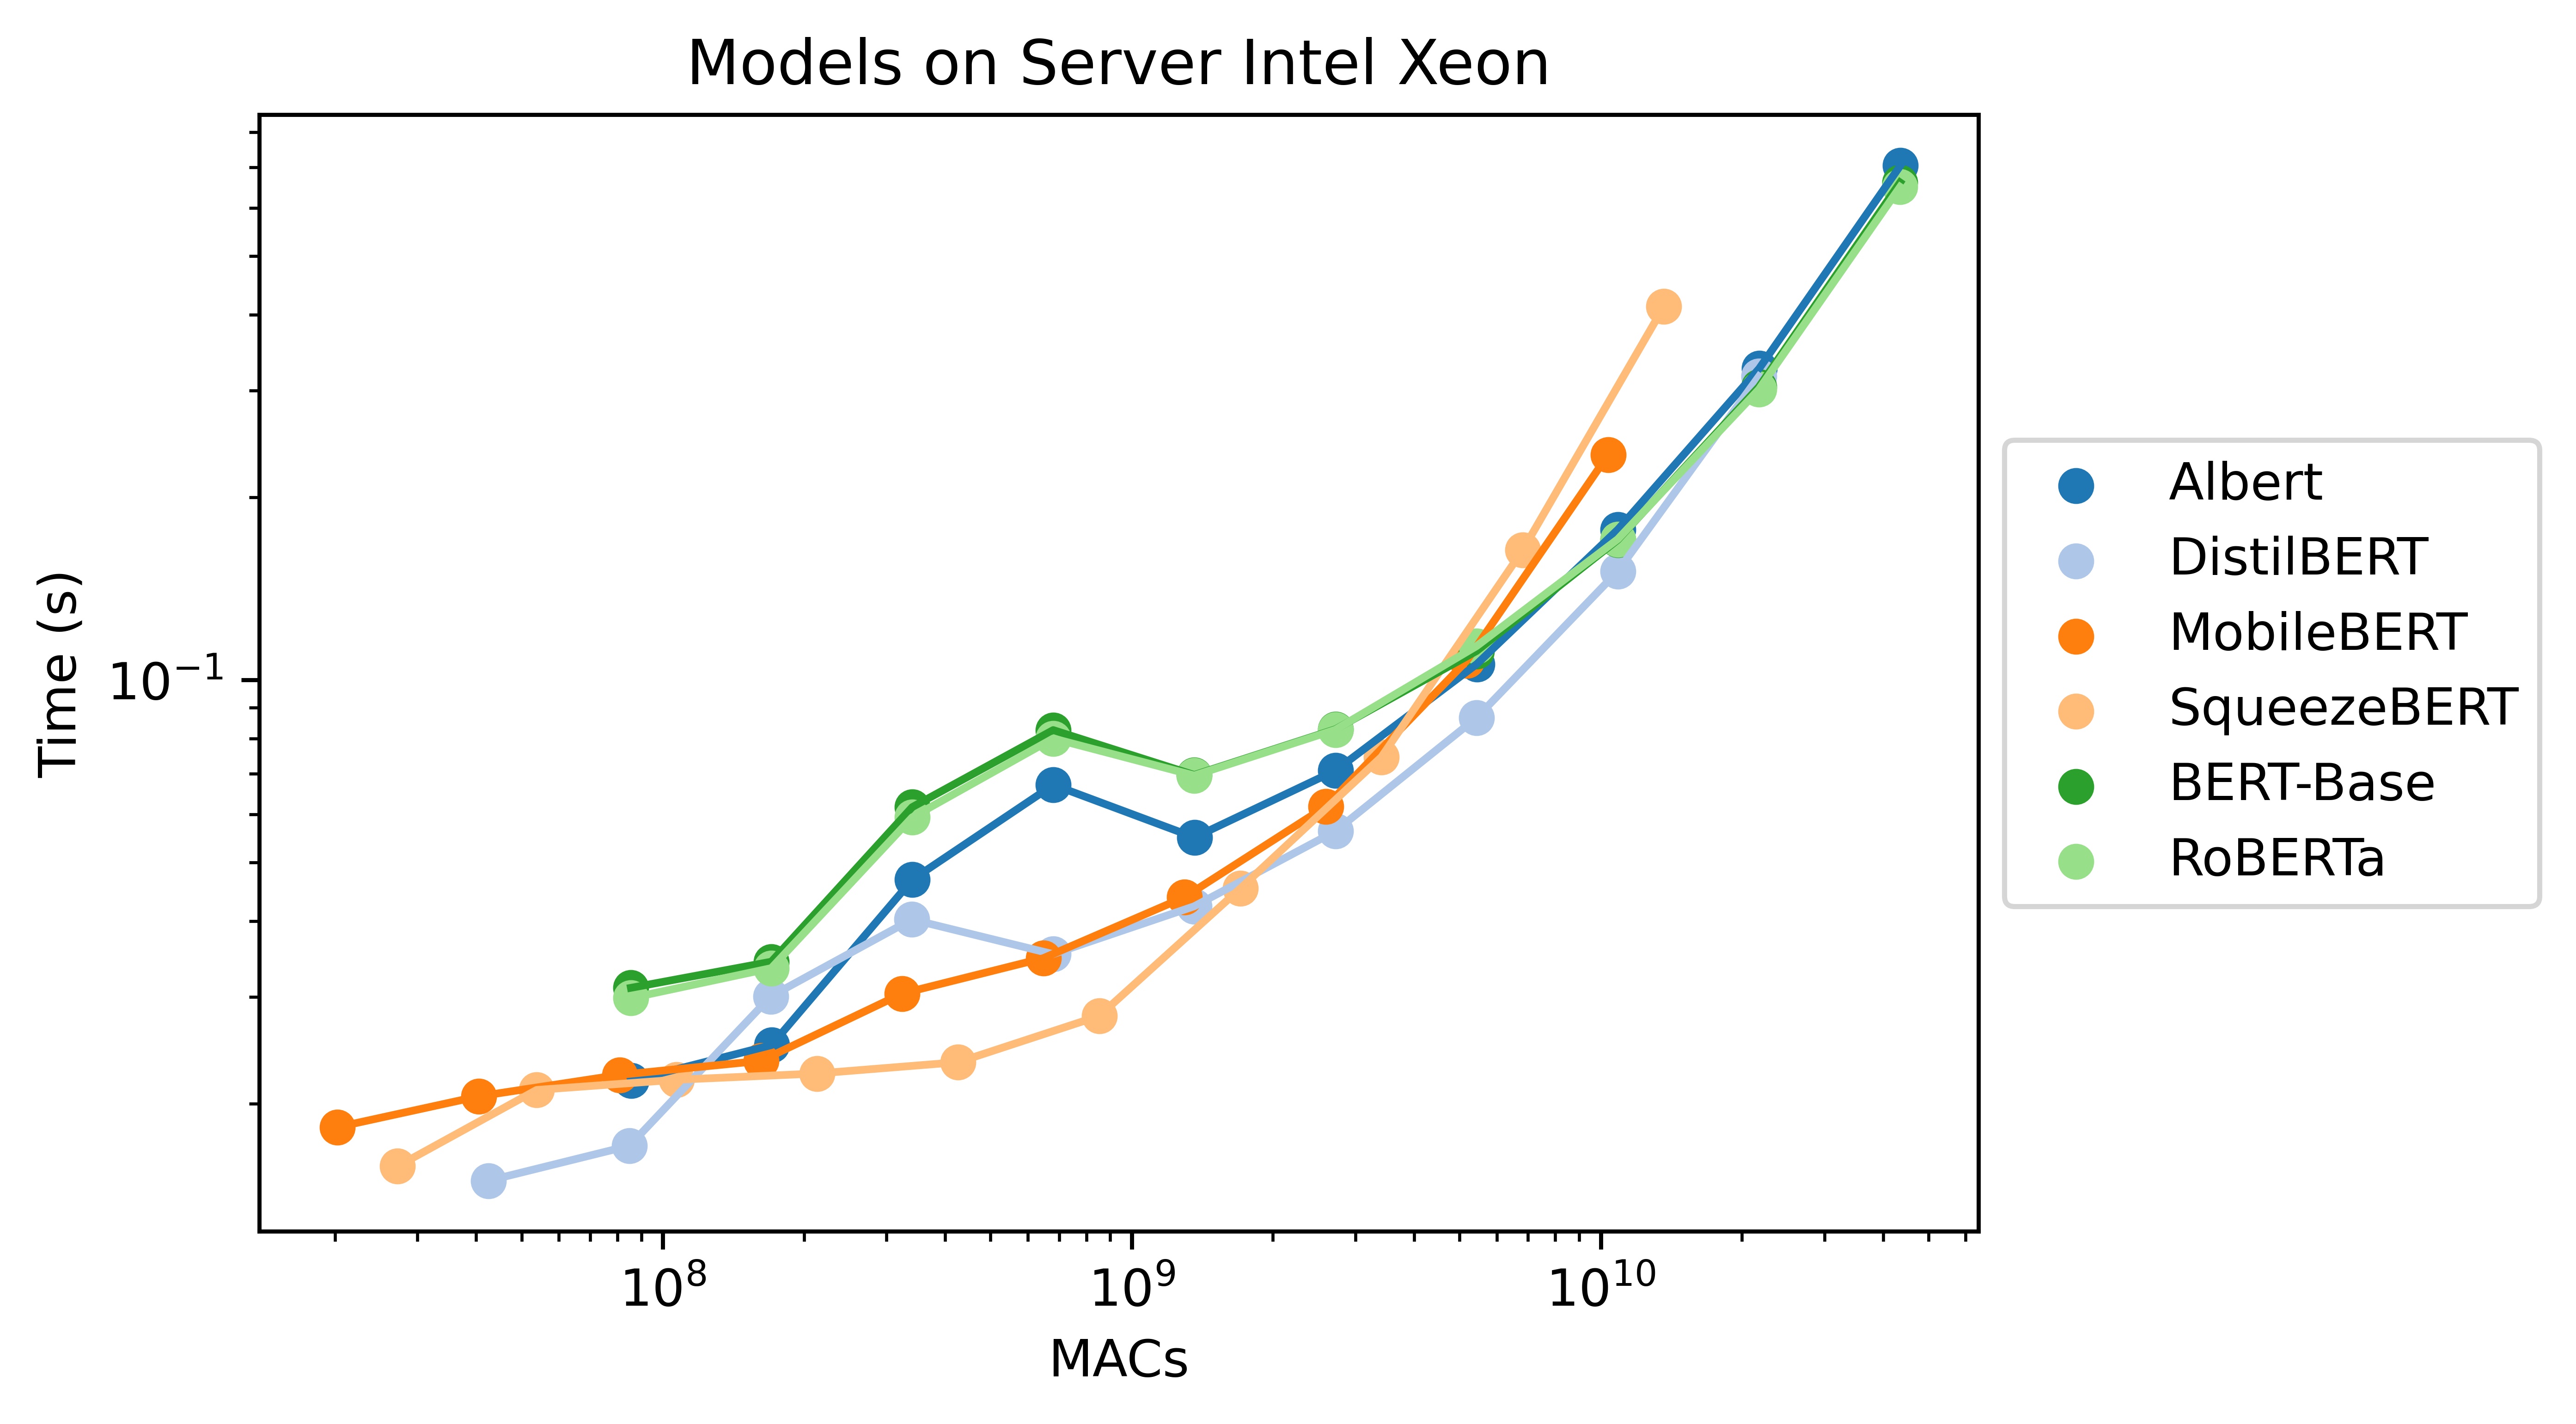

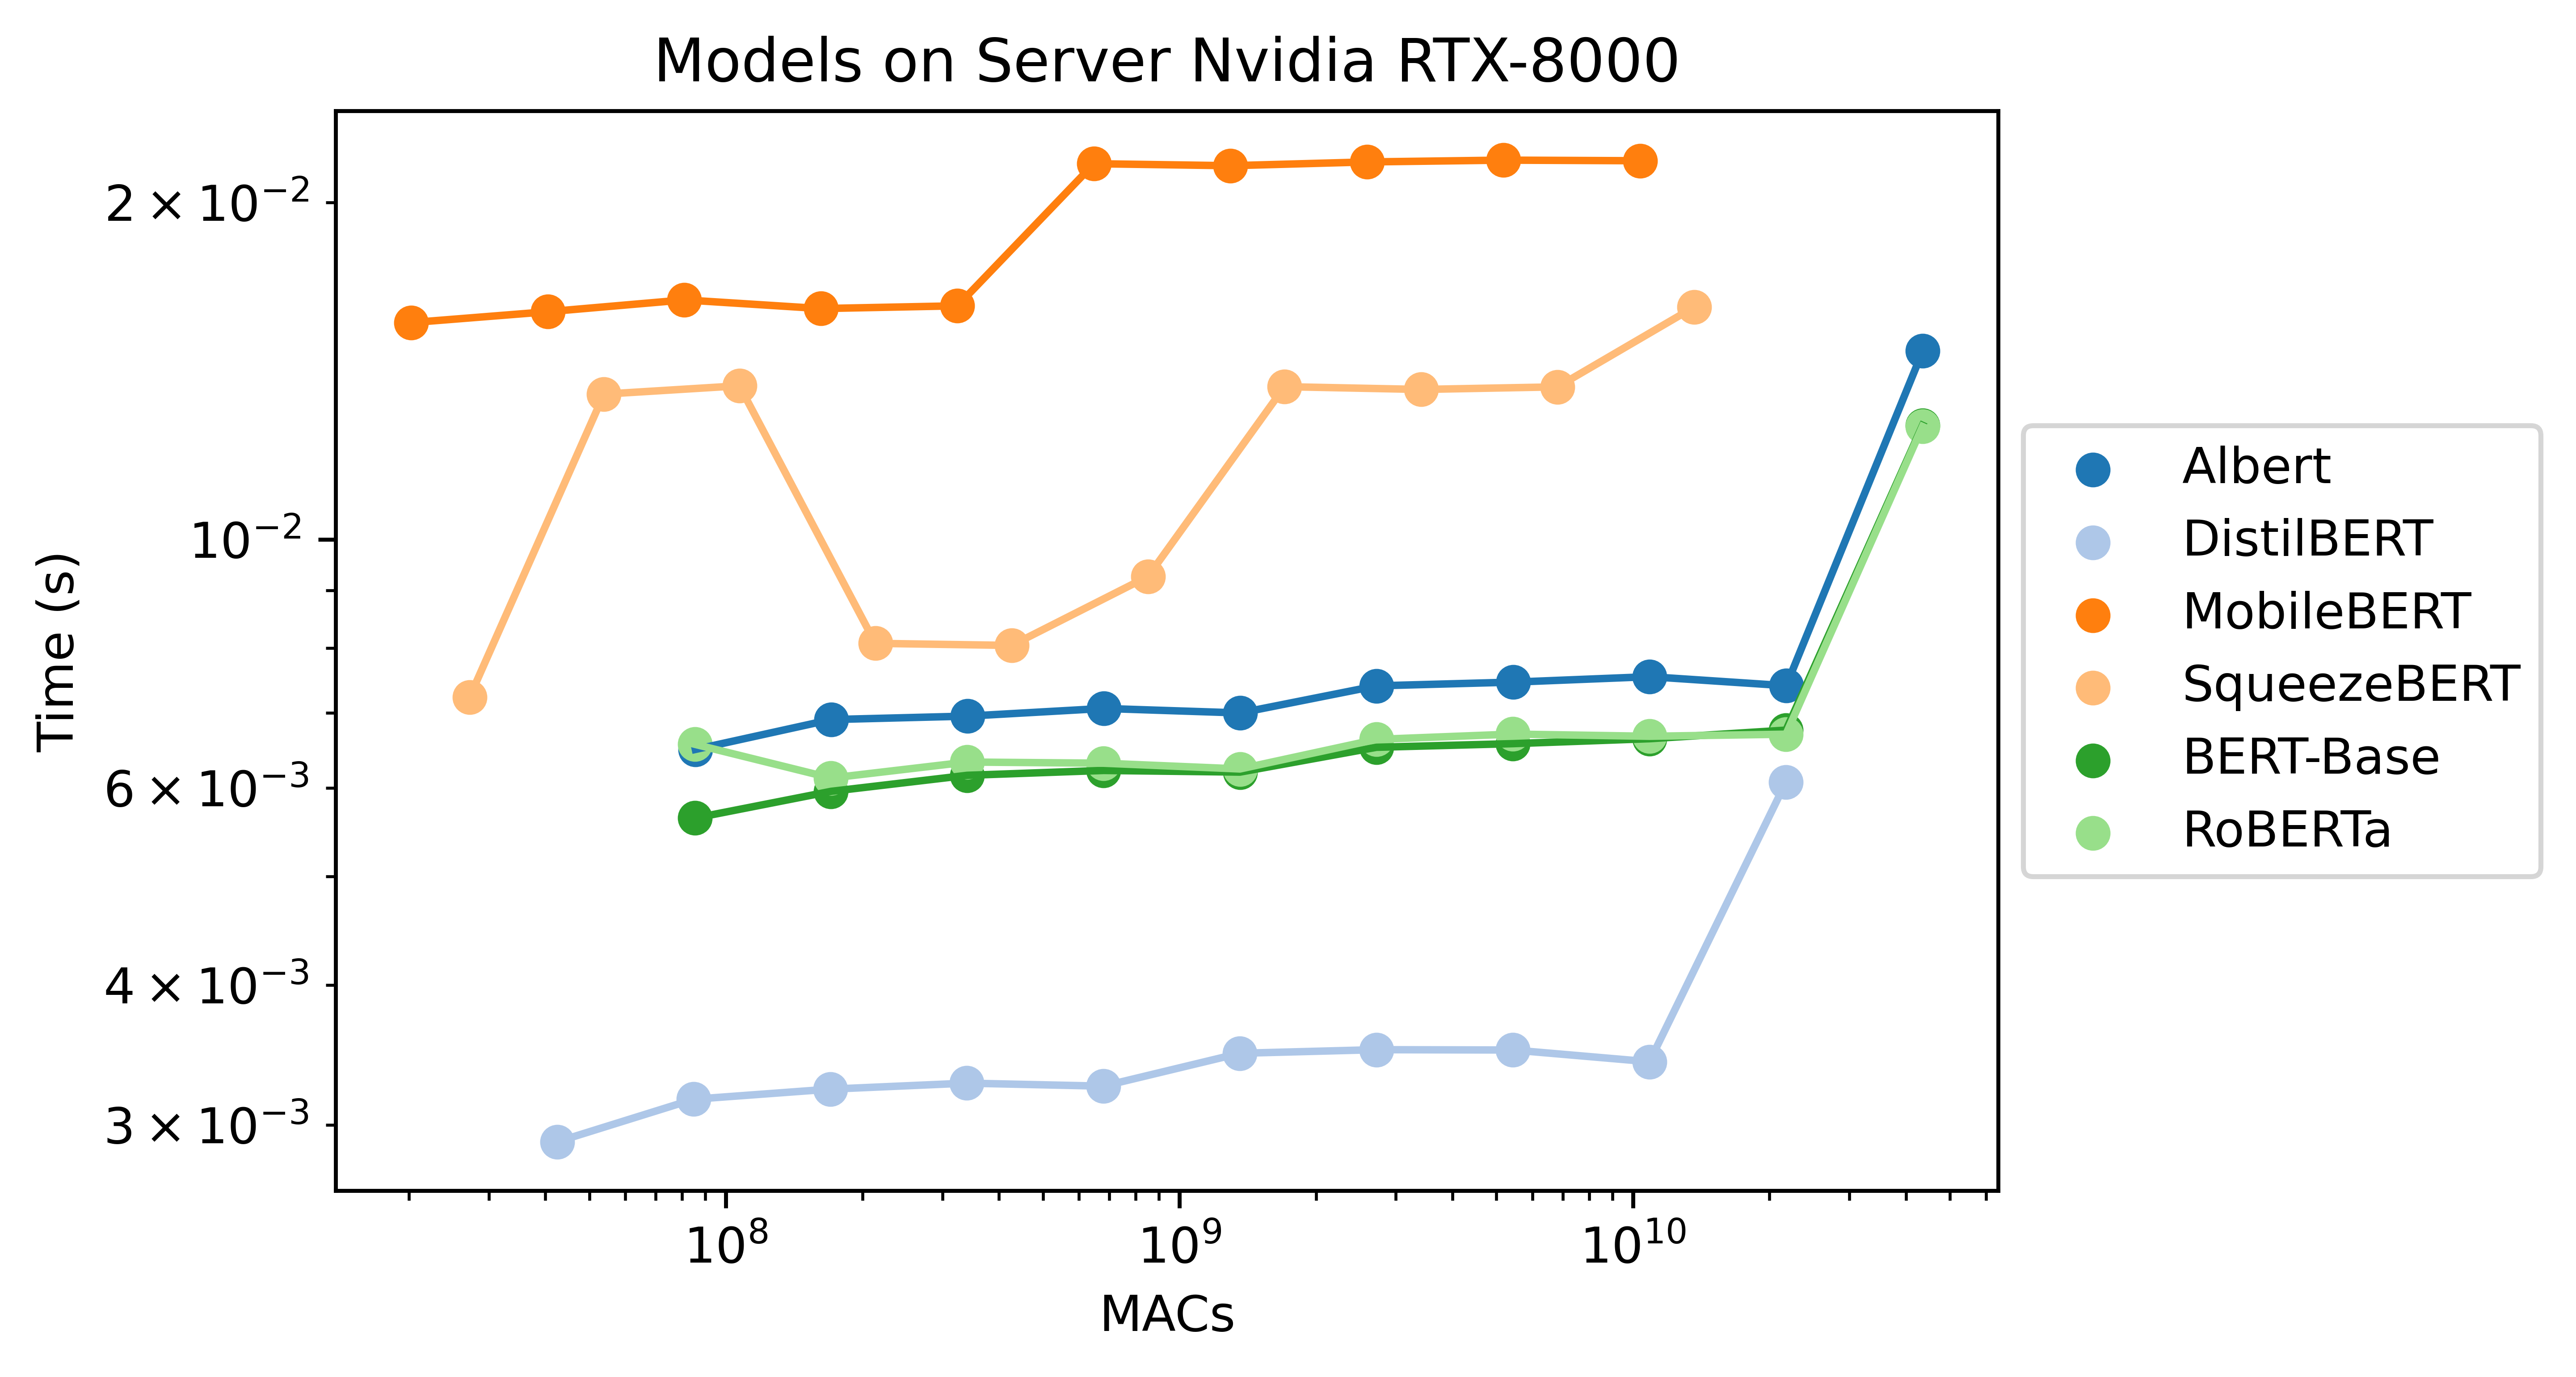

KeyError: 'v100'

In [189]:
linear_coeffs = {}
for device, device_name in DEVICE_LIST.items():
    device_seqlen = seqlen_baseline.loc[seqlen_baseline['device'] == device]
    avg_memory = np.array(device_seqlen['avg_memory']).reshape(-1, 1)
    mac_result = np.array(device_seqlen['macs']).reshape(-1, 1)
    wallclock_result = np.array(device_seqlen['latency']).reshape(-1, 1)
    param_count = np.array(device_seqlen['total_params']).reshape(-1, 1)

    # linear_model = LinearRegression(fit_intercept=False).fit(mac_result, wallclock_result)
    # linear_coeffs[device] = linear_model.coef_[0][0]
    # wallclock_predicted = linear_model.predict(mac_result)

    # plt.scatter(mac_result[:-1], wallclock_result[:-1], label="Hidden Size Linear Baseline")
    # plt.plot(mac_result[:-1], wallclock_predicted[:-1], "b--", label="Predicted Wallclock", linewidth=2)

    # device_layer = layer_baseline.loc[layer_baseline['device'] == device]
    # avg_memory = device_layer['avg_memory'].tolist()
    # mac_result = device_layer['macs'].tolist()
    # wallclock_result = device_layer['latency']
    # param_count = device_layer['total_params'].tolist()
    # plt.scatter(mac_result, wallclock_result, label="Layer Linear Baseline")
    # plt.plot(mac_result, wallclock_result)

    for model, model_name in {**LANGUAGE_MODELS}.items(): # , **VISION_MODELS}.items():
        if model_name == "Funnel Transformer": continue
        results = edge_results[device]
        # results = results.loc[results['img_size'] == 224]
        seq_lens = results.loc[results['model'] == model]['sequence_length'].tolist()
        # img_size = results.loc[results['model'] == model]['img_size'].tolist()
        avg_memory = results.loc[results['model'] == model]['avg_memory'].tolist()
        mac_result = results.loc[results['model'] == model]['macs'].tolist()
        wallclock_result = results.loc[results['model'] == model]['mean']
        param_count = results.loc[results['model'] == model]['total_params'].tolist()

        x_ax, x_label = mac_result, "MACs"
        y_ax, y_label = wallclock_result, "Time (s)"

        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.xscale('log')
        plt.yscale('log')
        plt.scatter(x_ax, y_ax, label=f"{model_name}")  
        plt.plot(x_ax,y_ax)

    plt.title(f"Models on {device_name}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
angles = {device: np.arctan(linear_coeffs[device]) for device in DEVICE_LIST}


In [32]:
v100_df = all_results['2080Ti']
bs1_df = v100_df[v100_df['batch_size'] == 1]
bs1_df = bs1_df[~bs1_df['model'].isin(['albert'])]

print(pearsonr(bs1_df['latency'], bs1_df['total_nn_calls']))


bs1_df = v100_df[v100_df['batch_size'] == 32]
bs1_df = bs1_df[~bs1_df['model'].isin(['albert'])]
print(pearsonr(bs1_df['latency'], bs1_df['macs']))

(0.874373557097865, 1.0417776480431767e-07)
(0.9521615941316833, 9.29394692834653e-12)


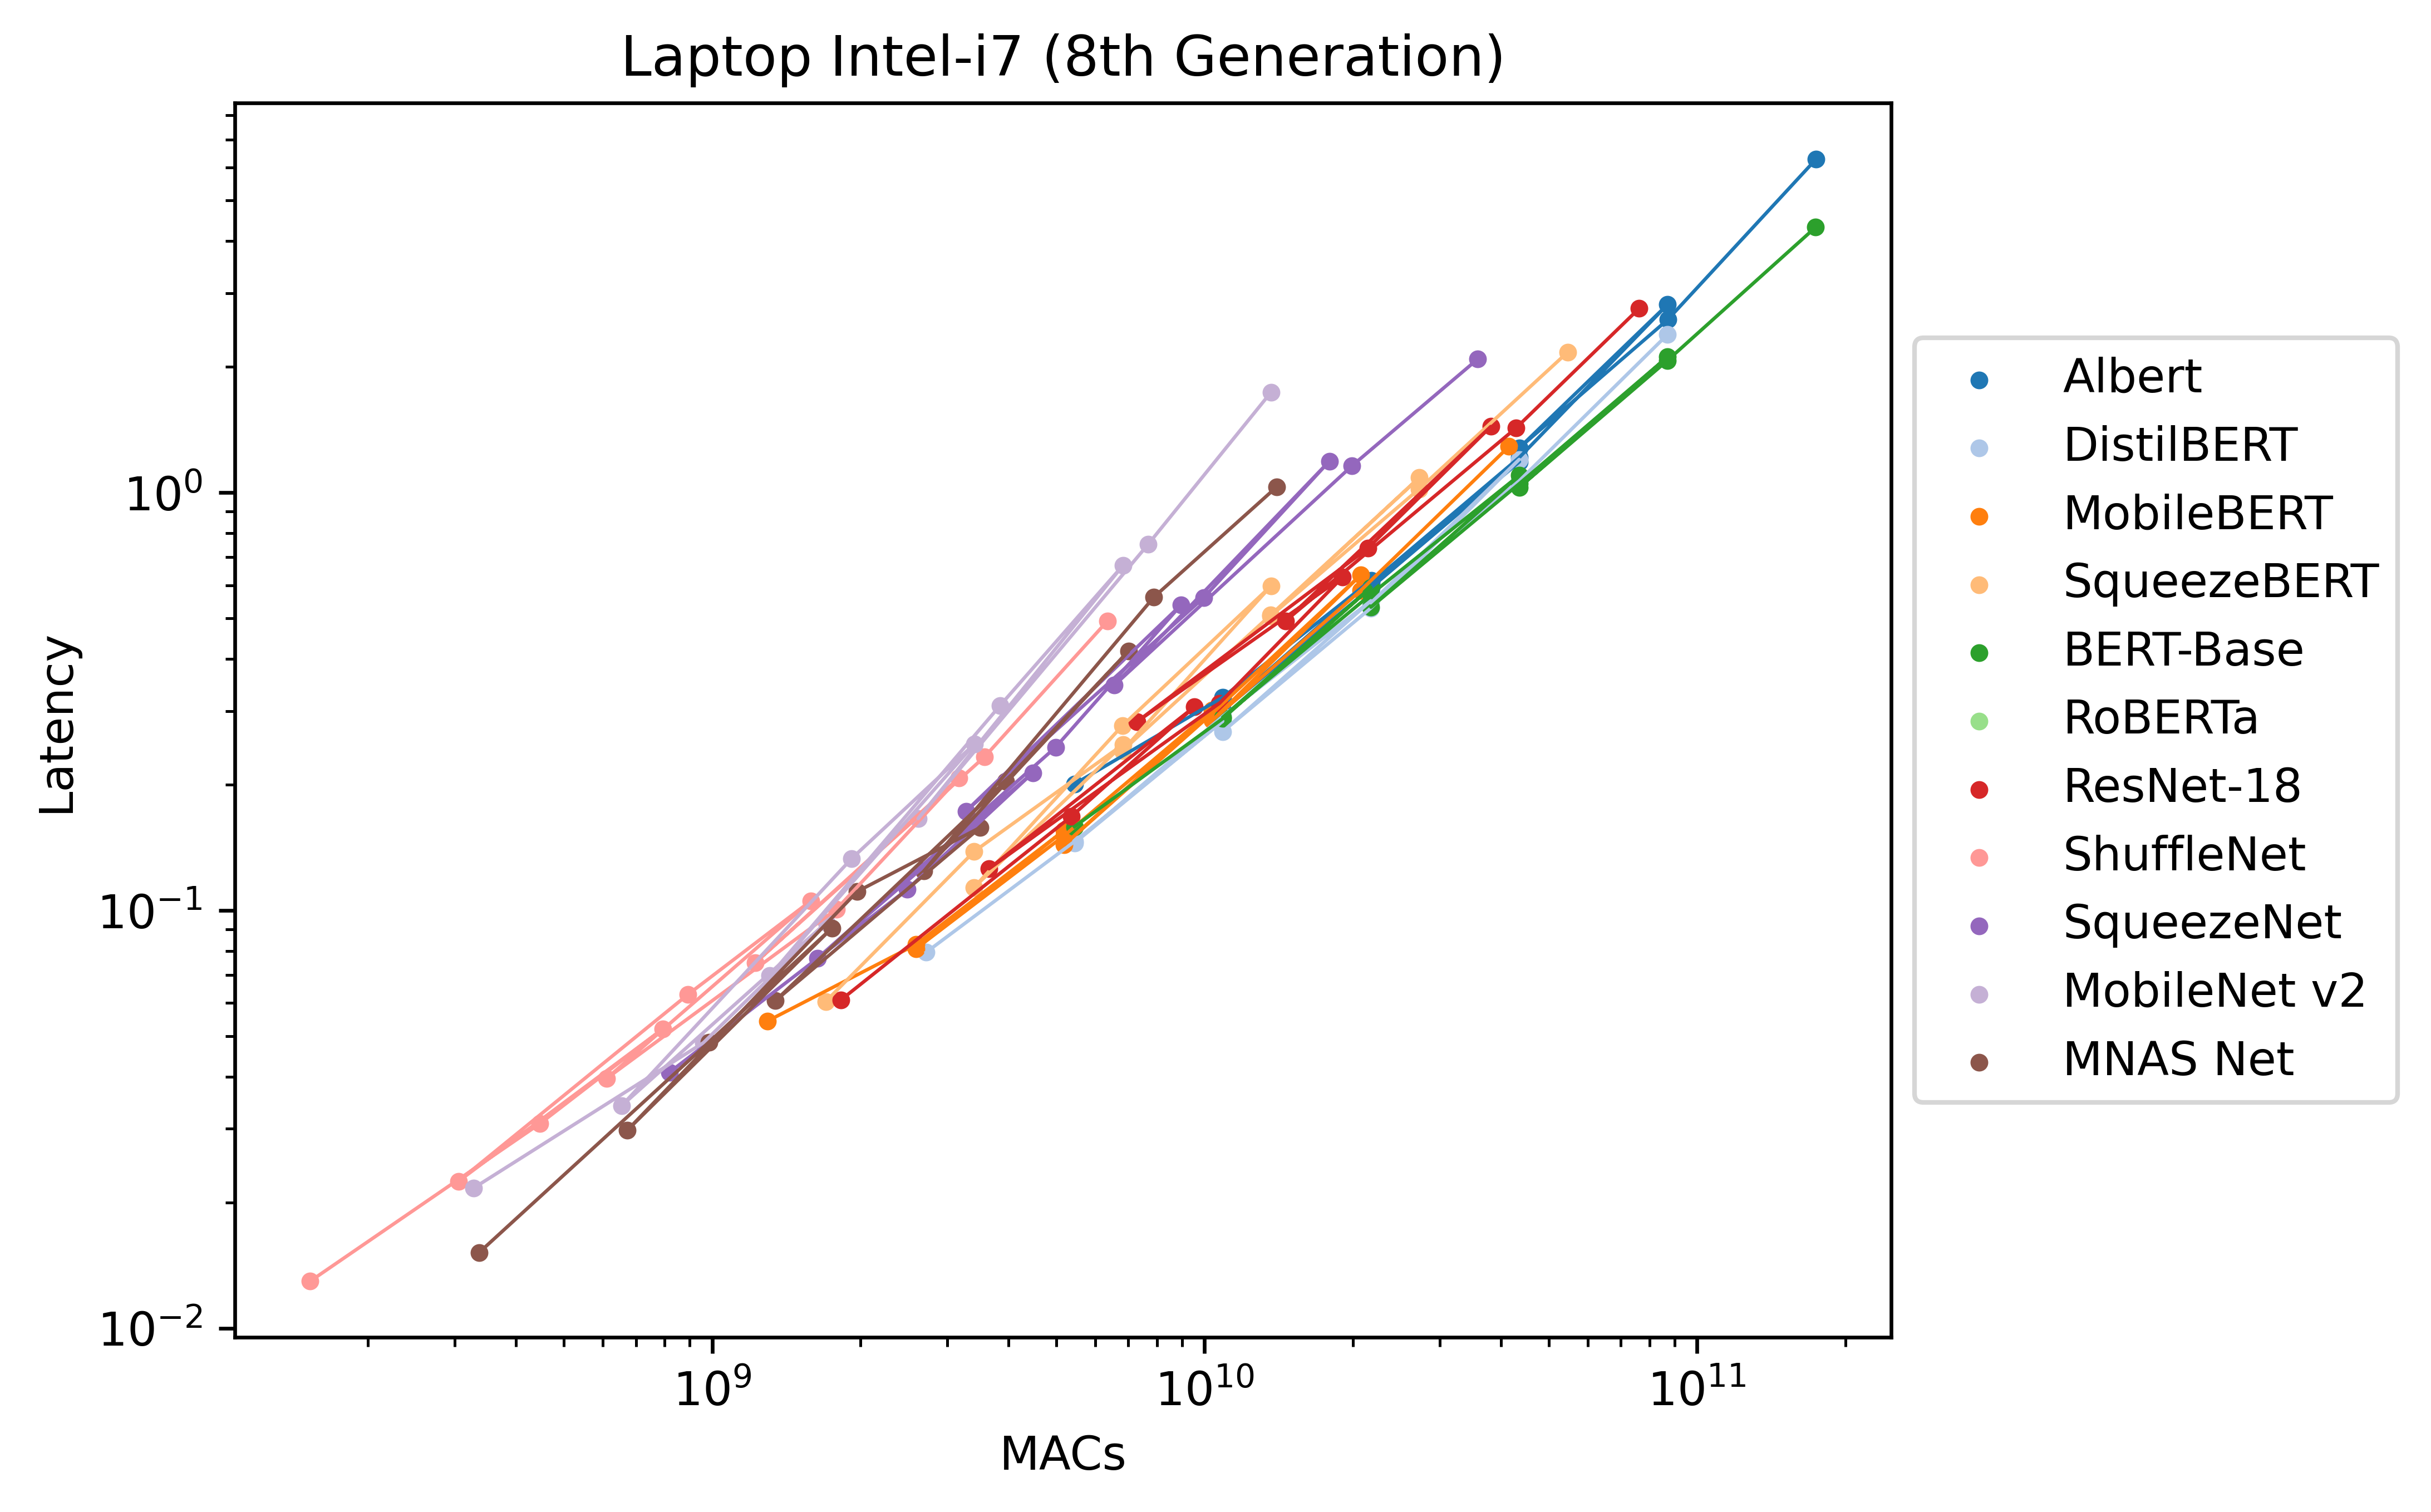

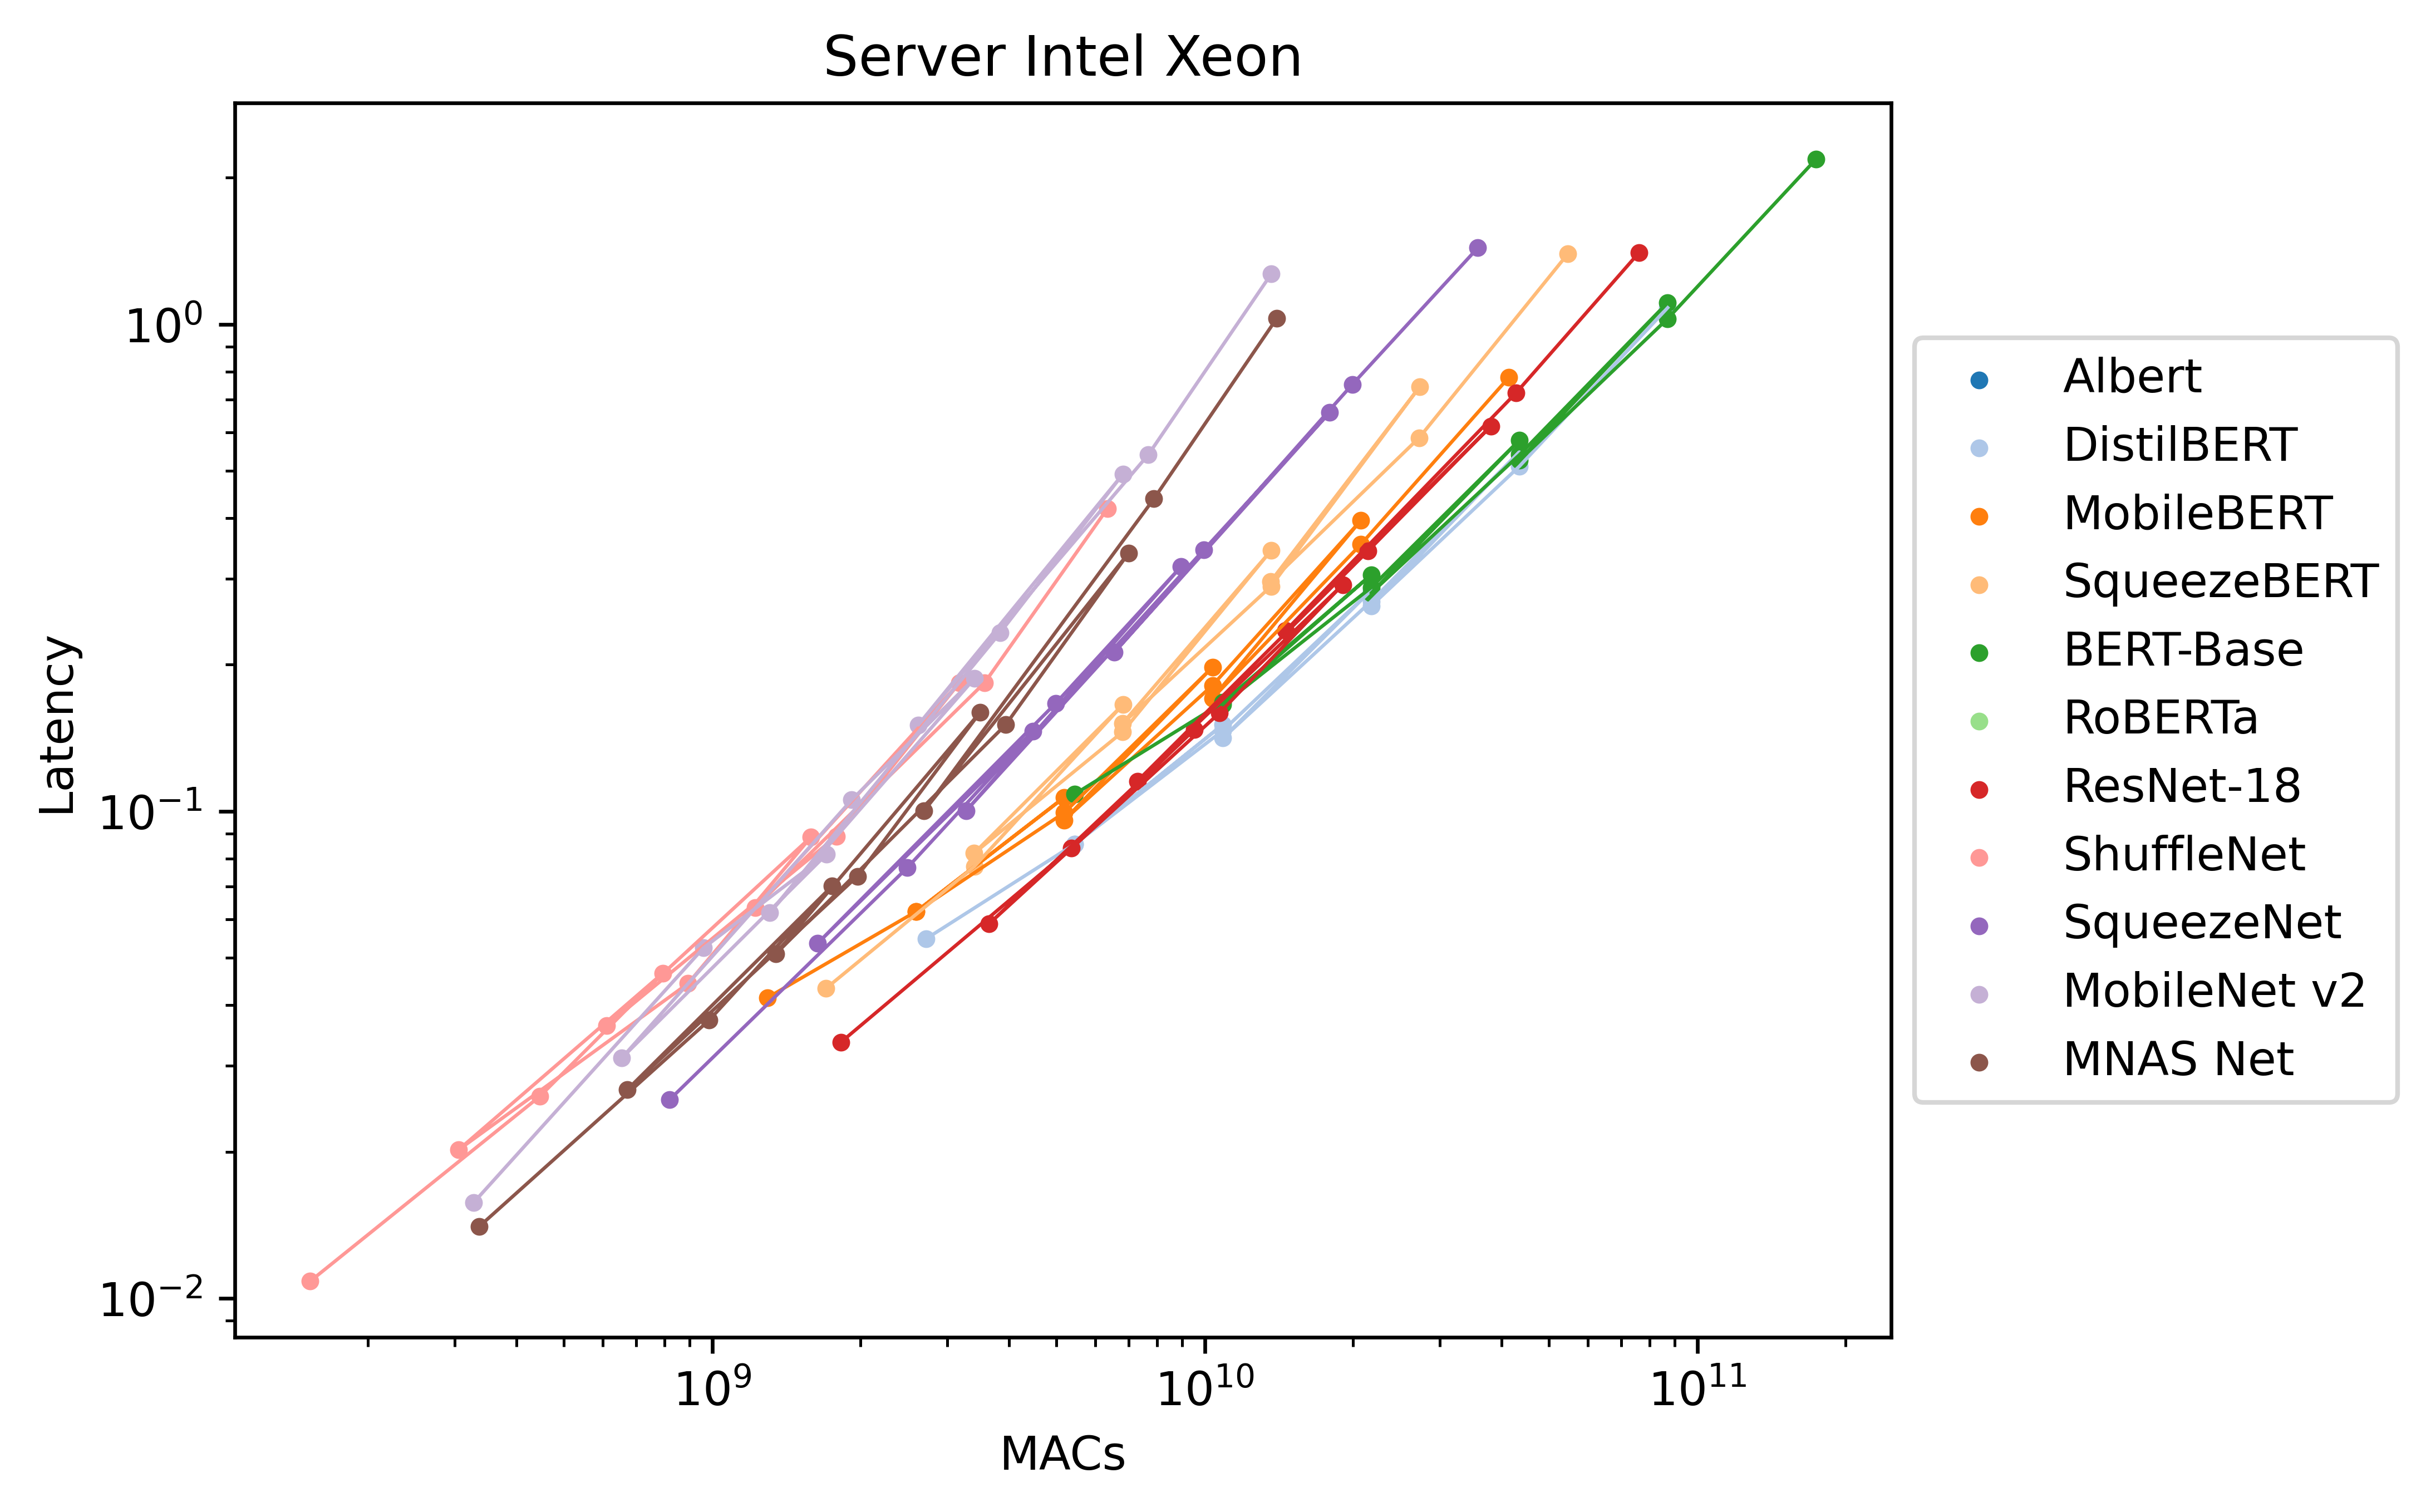

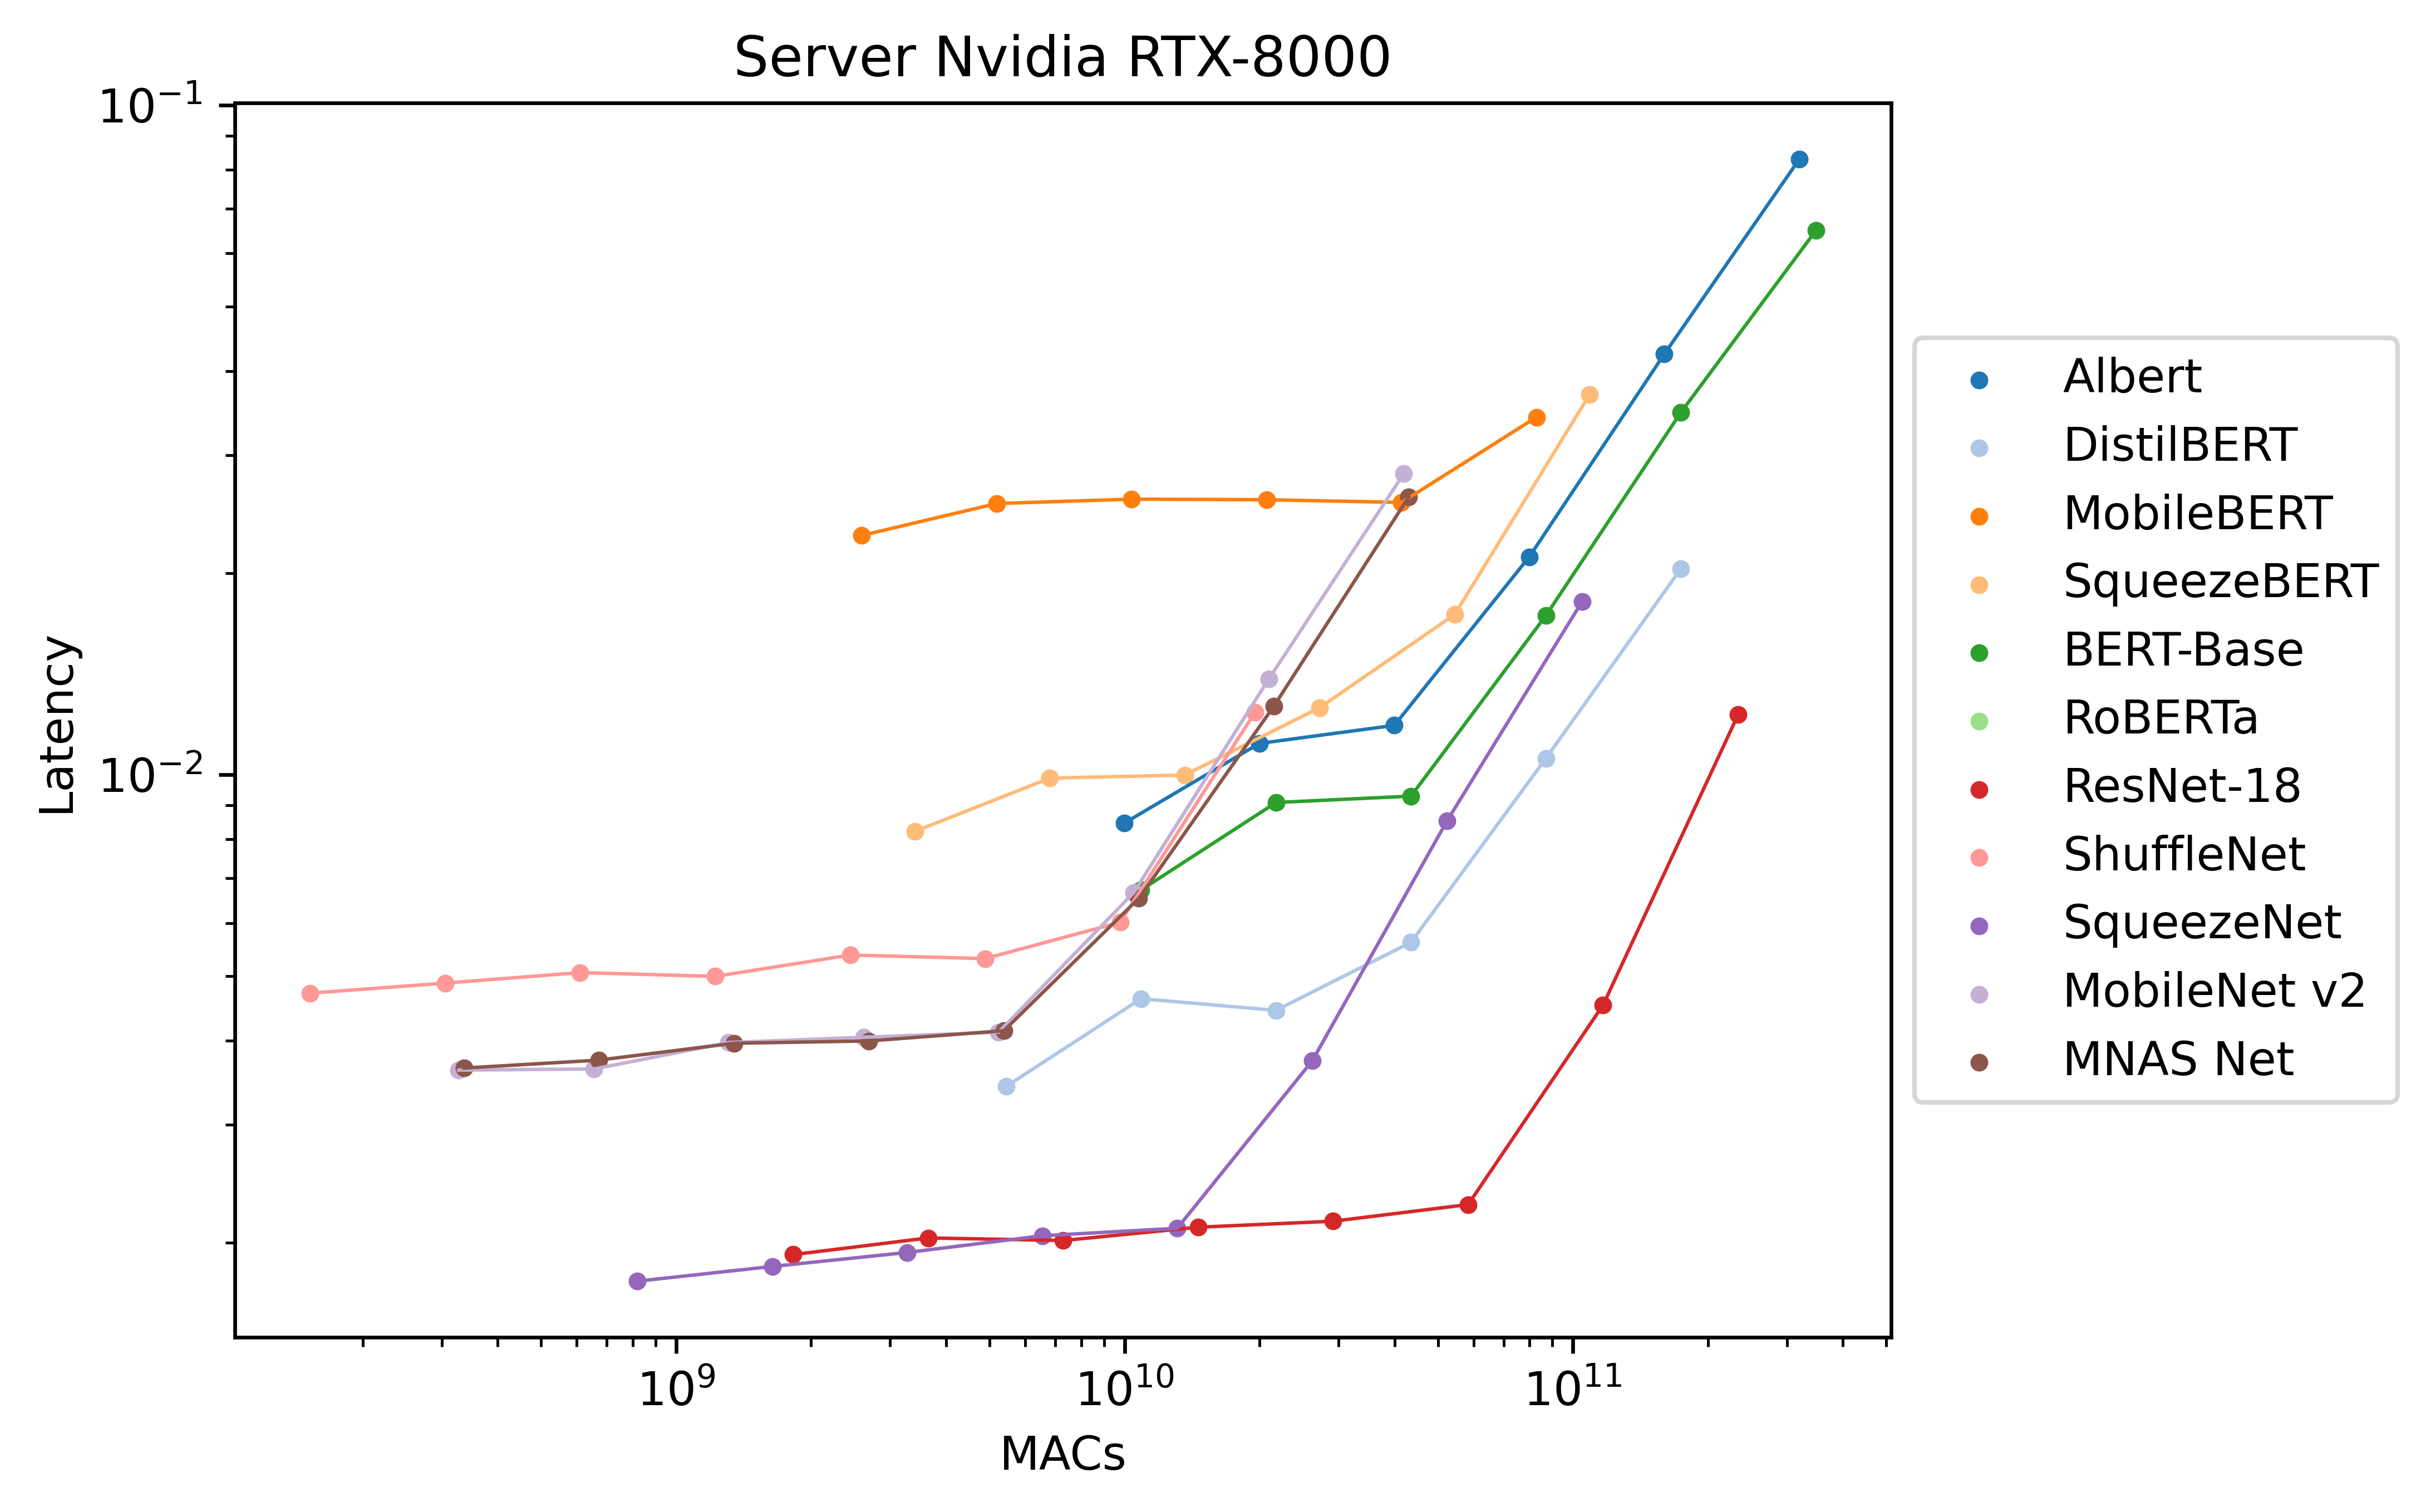

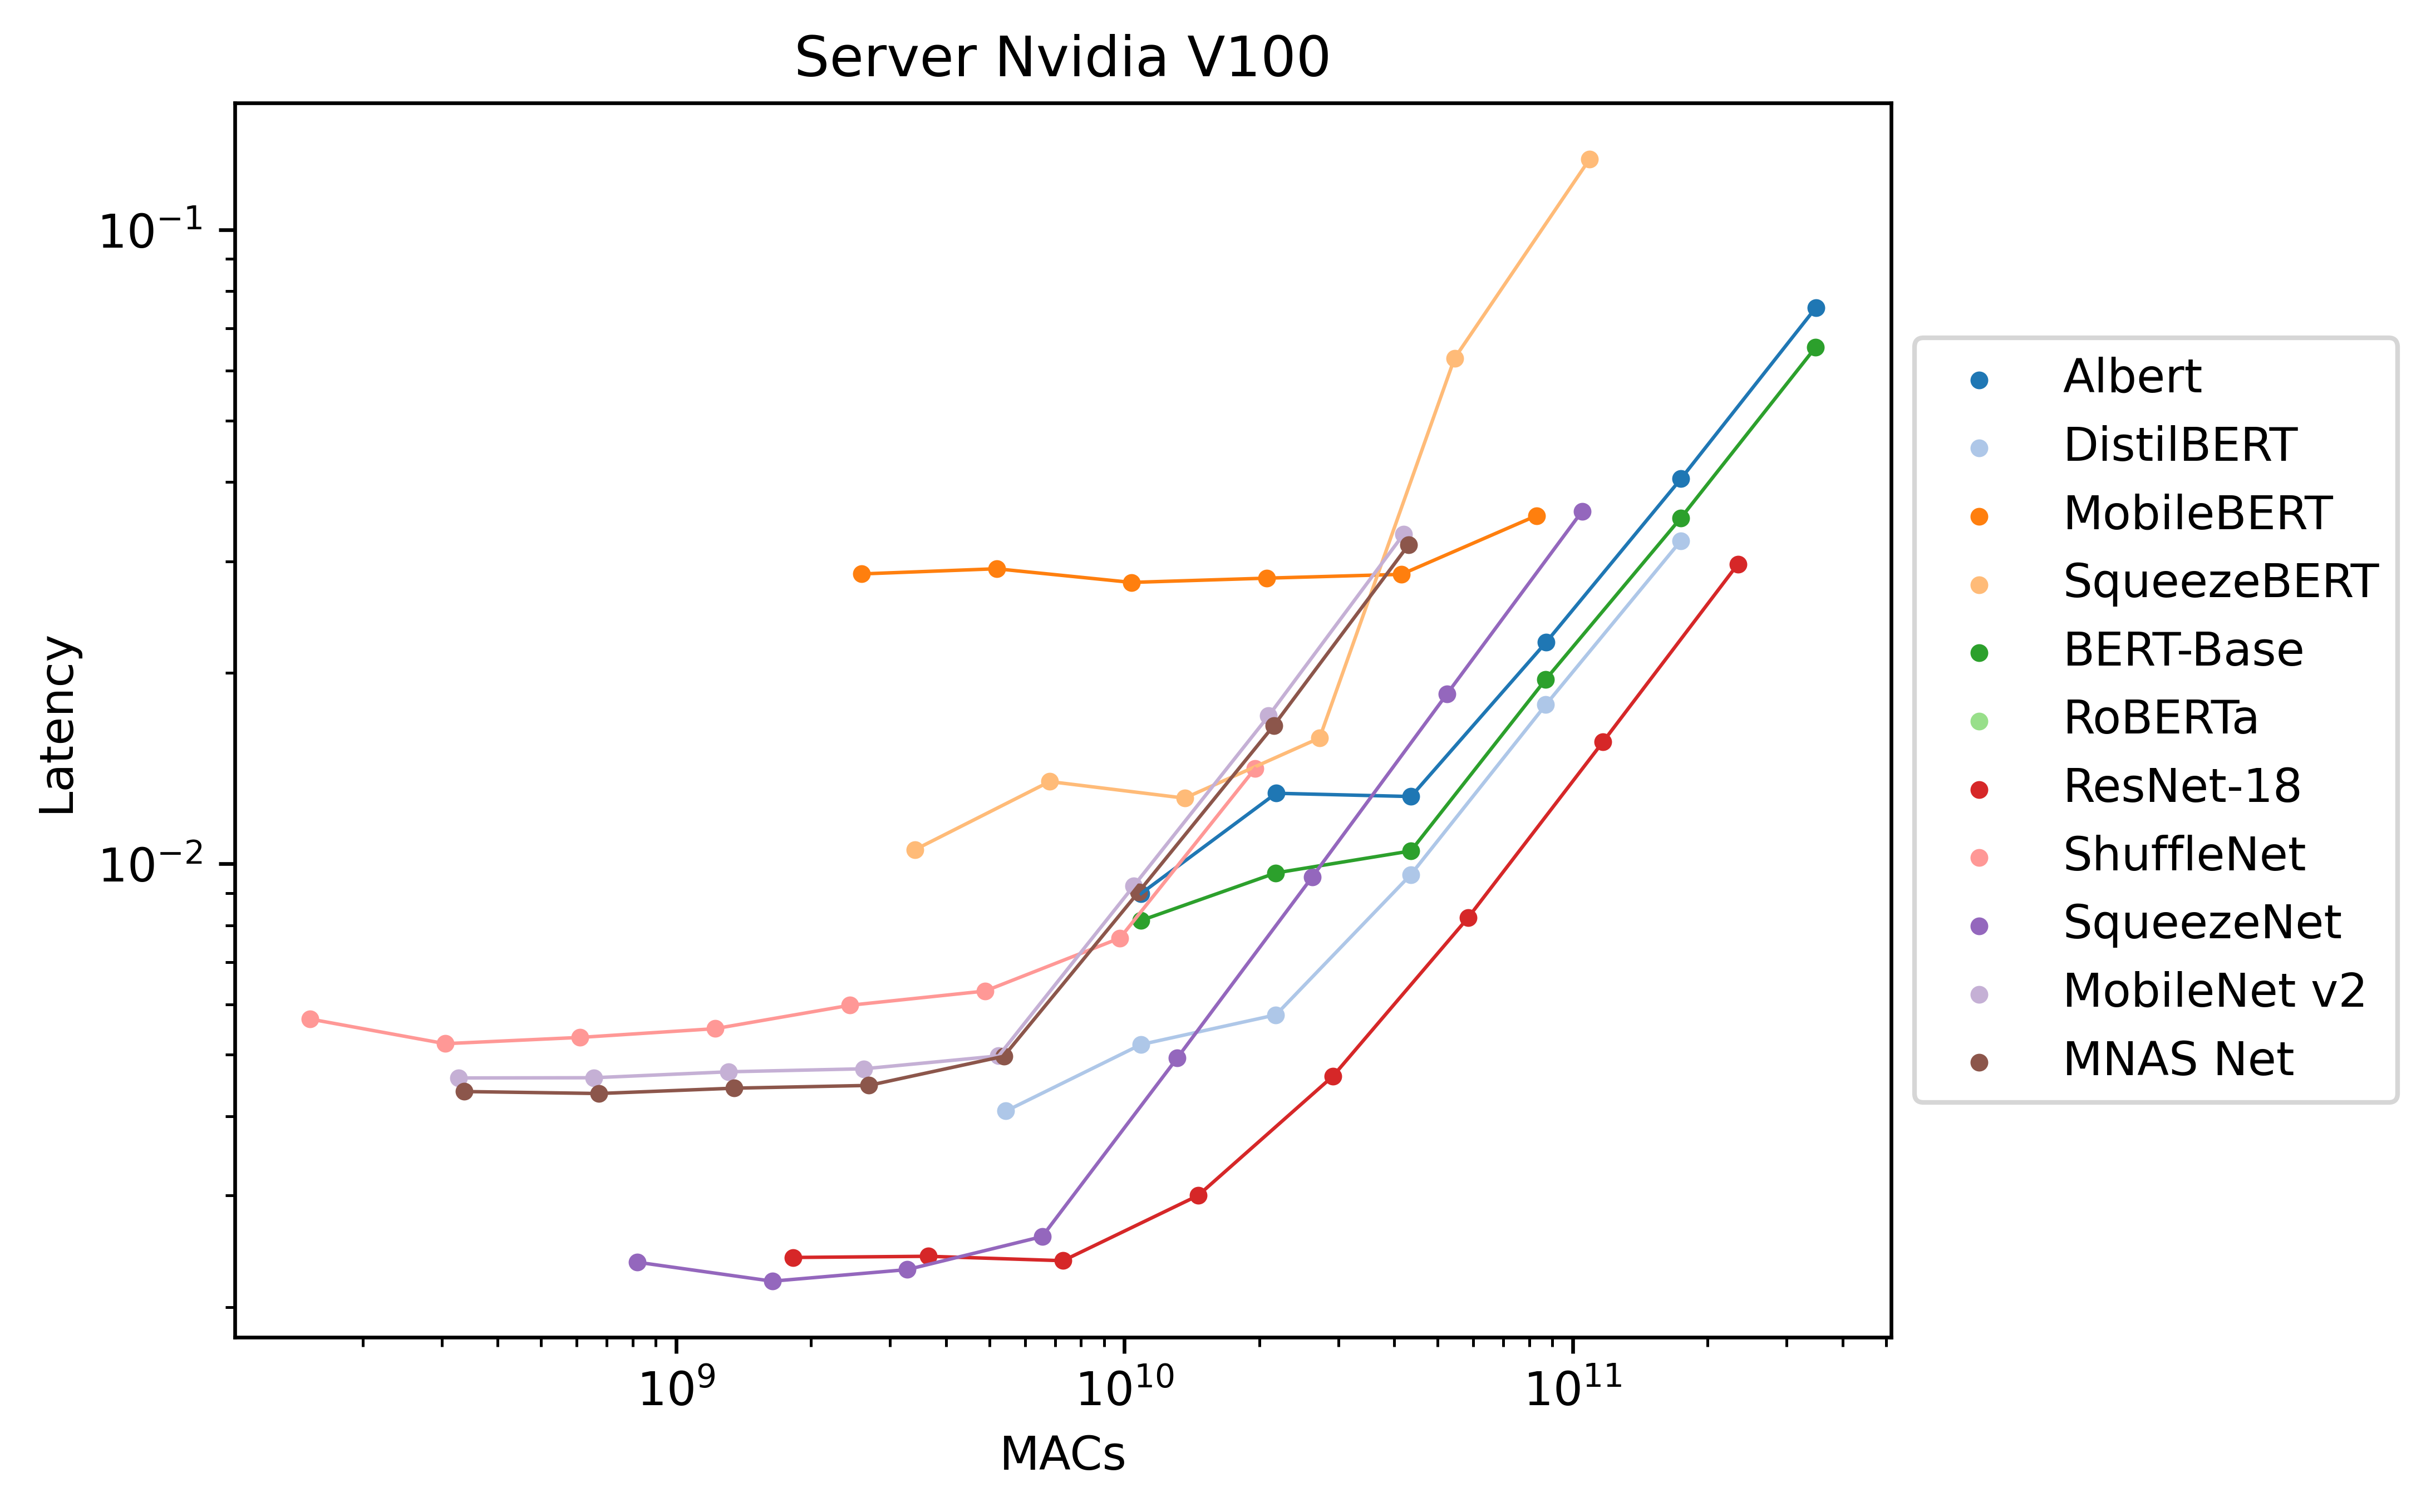

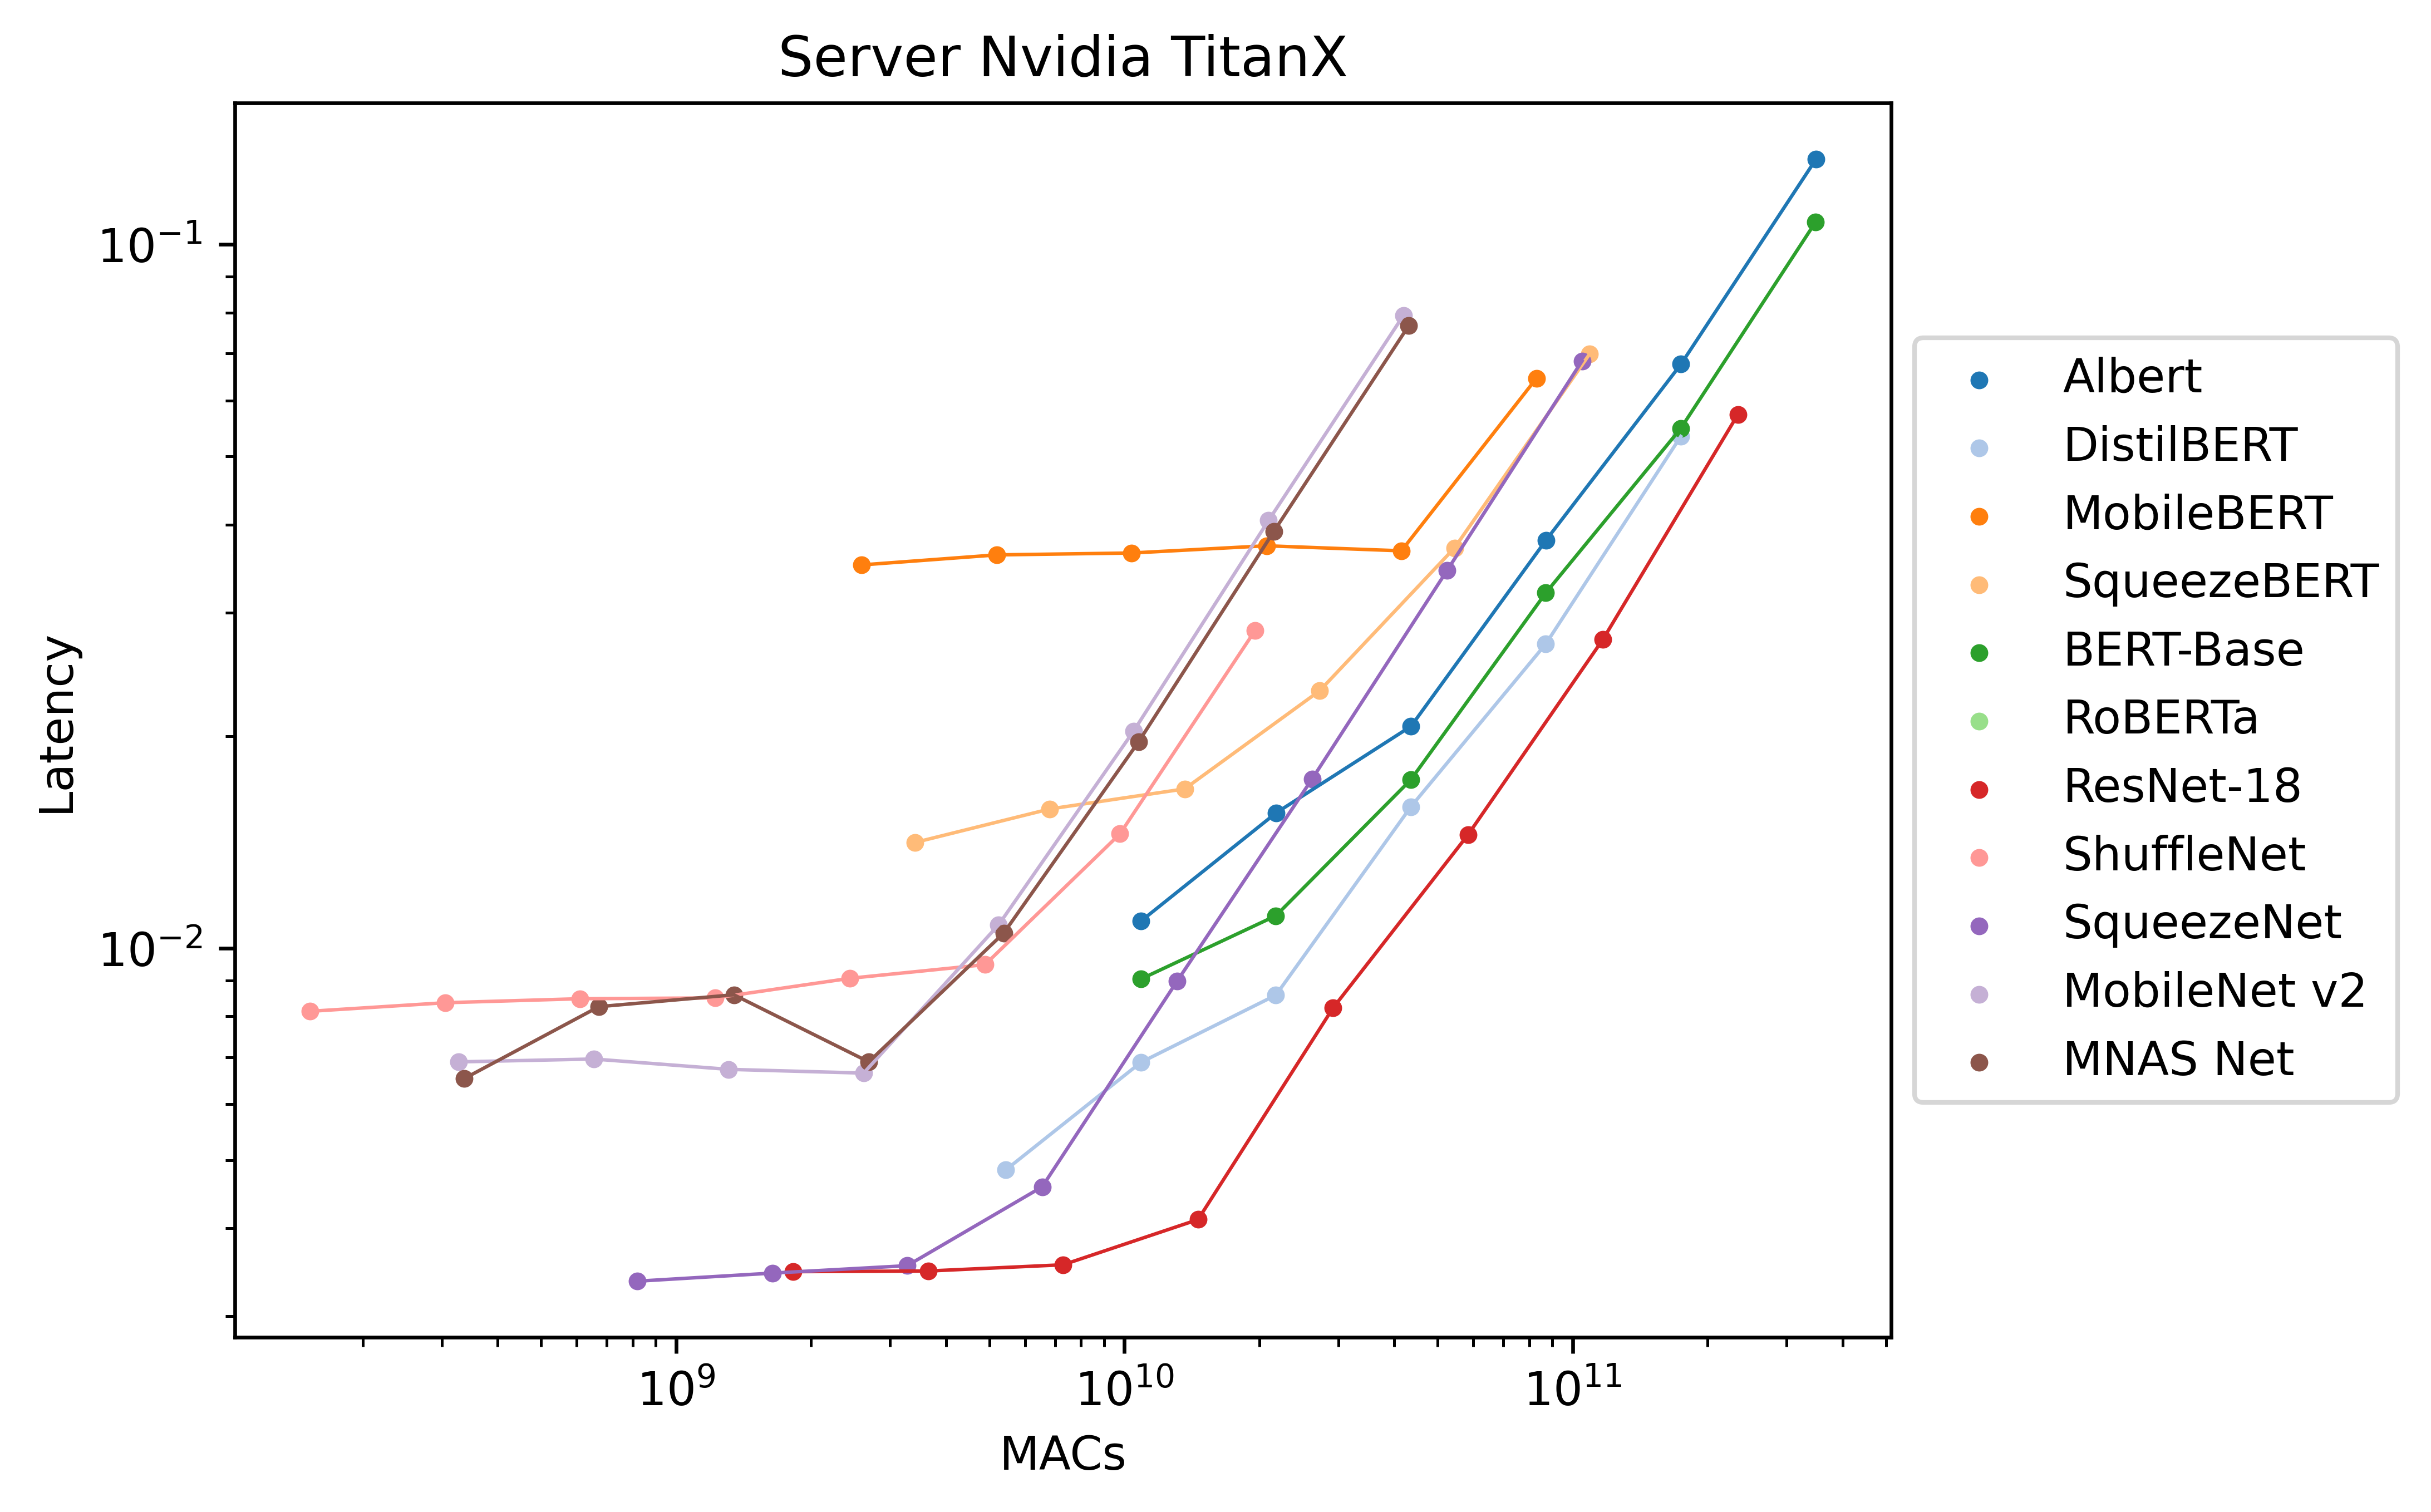

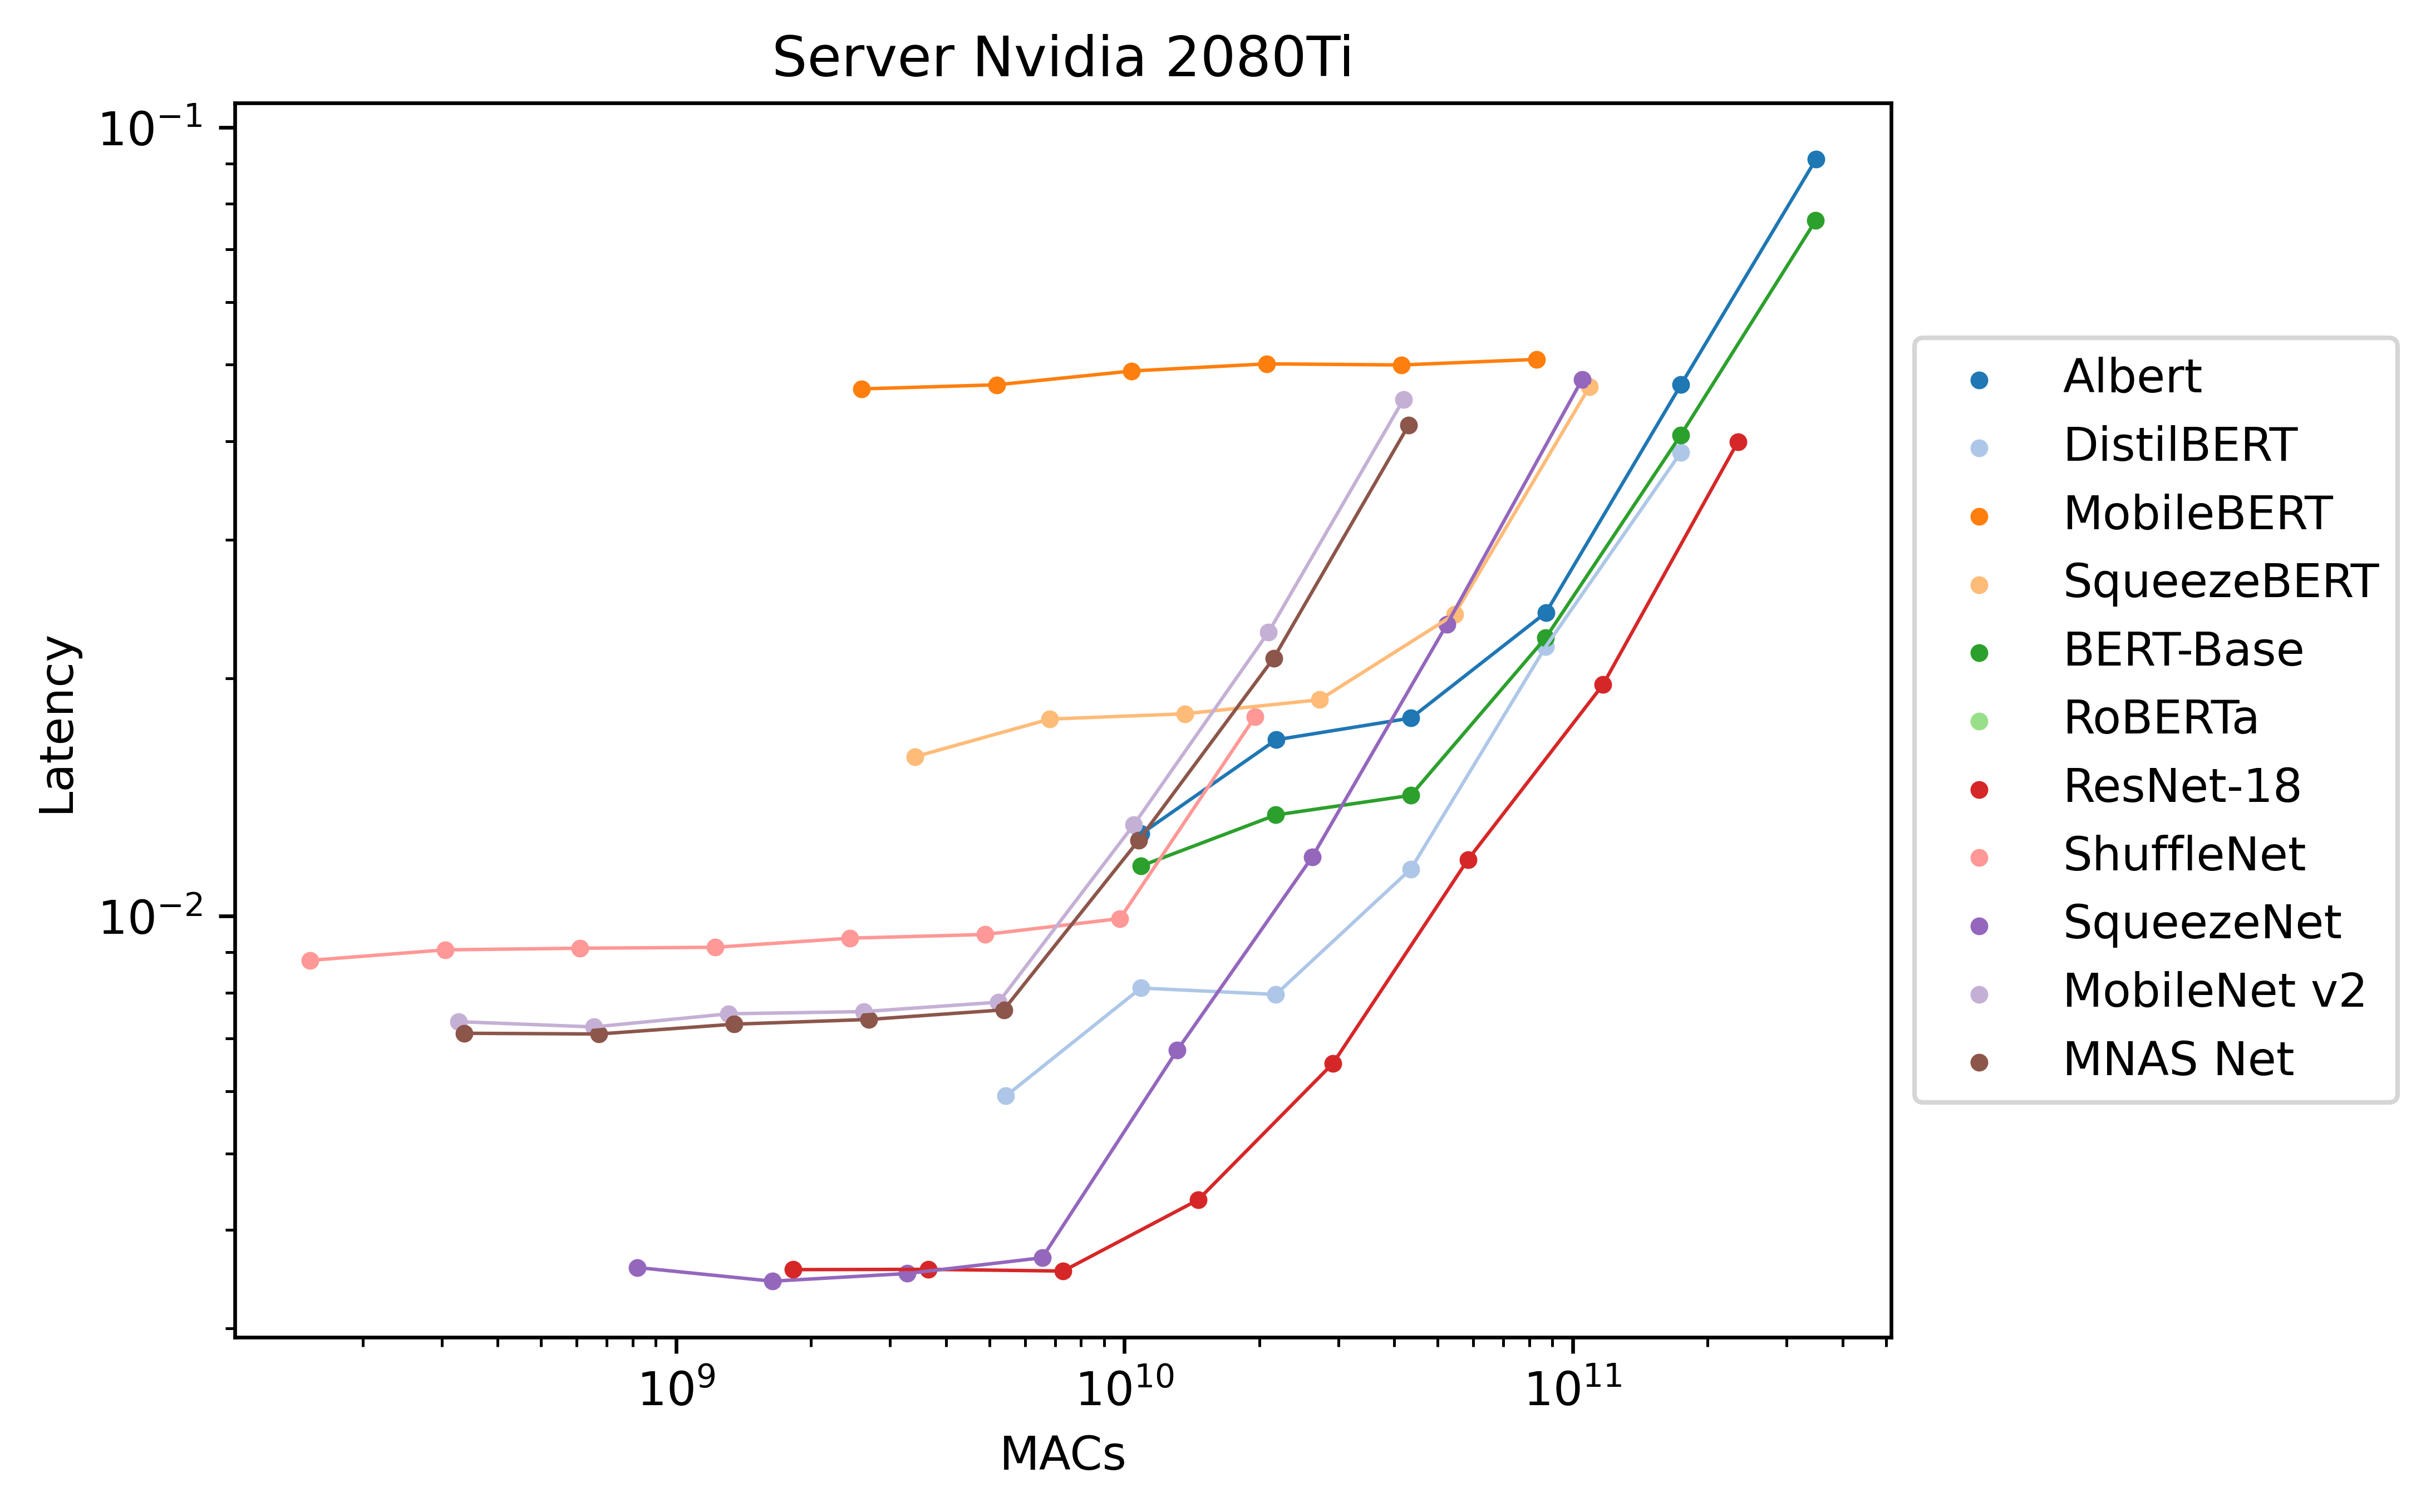

In [10]:
for MODELS in [{**LANGUAGE_MODELS, **VISION_MODELS}]:
    for device, device_name in DEVICE_LIST.items():
        for model, model_name in MODELS.items():
        # device_seqlen = seqlen_baseline.loc[seqlen_baseline['device'] == device]
        # avg_memory = np.array(device_seqlen['avg_memory']).reshape(-1, 1)
        # mac_result = np.array(device_seqlen['macs']).reshape(-1, 1)
        # wallclock_result = np.array(device_seqlen['latency']).reshape(-1, 1)
        # param_count = np.array(device_seqlen['total_params']).reshape(-1, 1)

        # linear_model = LinearRegression(fit_intercept=False).fit(mac_result, wallclock_result)
        # linear_coeffs[device] = linear_model.coef_[0][0]
        # wallclock_predicted = linear_model.predict(mac_result)

        # plt.scatter(mac_result[:-1], wallclock_result[:-1], label="Hidden Size Linear Baseline")
        # # plt.plot(mac_result[:-1], wallclock_result[:-1], "b-")
        # plt.plot(mac_result, wallclock_predicted, "b--", label="Predicted Wallclock", linewidth=2)

        # device_layer = layer_baseline.loc[layer_baseline['device'] == device]
        # avg_memory = device_layer['avg_memory'].tolist()
        # mac_result = device_layer['macs'].tolist()
        # wallclock_result = device_layer['latency']
        # param_count = device_layer['total_params'].tolist()
        # plt.scatter(mac_result, wallclock_result, label="Layer Linear Baseline")
        # plt.plot(mac_result, wallclock_result)

        # print(angles[device])
            # for bs in [2 ** _ for _ in range(6)]:
                if model in ["efficientnet", "efficientnet_lite", "vit32", "funnel_transformer"]: continue
                results = all_results[device]
                results = results[results['model'] == model]

                avg_memory = results['avg_memory'].tolist()
                mac_result = results['macs'].tolist()
                wallclock_result = results['latency']
                # op_count = results["total_nn_calls"]

                x_ax, x_label = mac_result, "MACs"
                y_ax, y_label = wallclock_result, "Latency"

                plt.xlabel(x_label)
                plt.ylabel(y_label)
                plt.xscale('log')
                plt.yscale('log')
                plt.scatter(x_ax, y_ax, s=8, label=model_name)
                plt.plot(x_ax,y_ax, linewidth=0.75)

        plt.title(device_name)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

In [239]:
all_results

{'herron_gpu':       latency    avg_memory    max_memory    model  batch_size  input_size  \
 0    0.002840  1.654391e+09  1.654391e+09    vit32         1.0       224.0   
 1    0.003730  2.054947e+09  2.054947e+09    vit32         2.0       224.0   
 2    0.004531  2.457600e+09  2.457600e+09    vit32         4.0       224.0   
 3    0.007621  2.057044e+09  2.057044e+09    vit32         8.0       224.0   
 4    0.013218  2.096890e+09  2.096890e+09    vit32        16.0       224.0   
 ..        ...           ...           ...      ...         ...         ...   
 123  0.003011  1.318846e+09  1.318846e+09  mnasnet         8.0       224.0   
 124  0.003058  1.379664e+09  1.379664e+09  mnasnet        16.0       224.0   
 125  0.003062  1.478230e+09  1.478230e+09  mnasnet        32.0       224.0   
 126  0.003804  1.635516e+09  1.635516e+09  mnasnet        64.0       224.0   
 127  0.007871  1.922826e+09  1.922826e+09  mnasnet       128.0       224.0   
 
     accelerator requires_grad use_t

In [235]:
gpu_df = all_results['herron_gpu']
gpu_df = gpu_df[gpu_df['batch_size'] == 1]
gpu_df = gpu_df[gpu_df['model'].isin({**LANGUAGE_MODELS, **VISION_MODELS})]
gpu_df[['model', 'total_nn_calls']].sort_values('total_nn_calls')

model  total_nn_calls
114              albert            15.0
0              resnet18            52.0
16           squeezenet            57.0
102          distilbert            62.0
132        squeeze_bert           123.0
96                 bert           135.0
64         mobilenet_v2           141.0
88              mnasnet           141.0
56           shufflenet           151.0
108  funnel_transformer           174.0
126         mobile_bert           410.0